In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import random

In [3]:
random.seed(42)

# Đọc dữ liệu từ excel

In [4]:
DATA_PATH = "/content/bank.xlsx"

In [5]:
df = pd.read_excel(DATA_PATH, sheet_name="Data")
df

,Bank Code,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax
0,NaN,NaN,NE,NB,LPROD,NPROD,ERATIO,BRATIO,DEPOSITS,EQUITY,...,ROA,ROE,NIM,CIR,LTA,LTD,GTA,OBS,PBT,PAT
1,ABB,2005.0,94,NaN,87.553191,NaN,0.001387,NaN,209317,188076,...,1.210814,4.375891,6.863489,68.922299,39.94068,129.698018,4.38453,9445,11431,8230
2,ABB,2006.0,309,14,41.016181,905.285714,0.004281,0.003501,1551159,1190274,...,0.407014,1.064797,3.372963,75.997361,63.467204,127.408215,64.127534,508996,35287,12674
3,ABB,2007.0,1123,54,144.05699,2995.851852,0.011123,0.013012,6776279,2479200,...,0.941976,6.525331,3.168811,80.181379,59.601958,151.057977,-15.637631,526026,230793,161776
4,ABB,2008.0,1345,70,36.948699,709.942857,0.010816,0.000354,6673746,3955514,...,0.368279,1.256373,4.183087,95.808324,47.981036,97.016293,30.03161,3236046,65414,49696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,WEB,2008.0,404,61,245.960396,1628.983607,0.003249,0.000308,859372,1101678,...,3.725179,9.019695,13.718481,47.946461,44.64603,138.580149,34.219728,NaN,138059,99368
628,WEB,2009.0,594,71,201.180135,1683.112676,0.004291,0.000353,3309044,1136828,...,1.157908,10.511792,1.948003,66.647576,81.491402,254.159661,-34.946482,NaN,160149,119501
629,WEB,2010.0,763,71,66.952818,719.507042,0.004957,0.000342,5593260,1993434,...,0.545493,2.562663,3.783109,91.458874,56.103623,93.935648,20.491398,NaN,67373,51085
630,WEB,2011.0,874,76,138.169336,1588.947368,0.005051,0.004121,12629595,3162784,...,0.796281,3.818155,8.1131,92.201092,33.554827,40.292329,61.685673,NaN,160559,120760


Dòng thứ 1 của dataset là viết tắt của column title. Ta có thể loại bỏ

In [6]:
df = df[df["Bank Code"].notna()]

In [7]:
df

,Bank Code,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax
1,ABB,2005.0,94,NaN,87.553191,NaN,0.001387,NaN,209317,188076,...,1.210814,4.375891,6.863489,68.922299,39.94068,129.698018,4.38453,9445,11431,8230
2,ABB,2006.0,309,14,41.016181,905.285714,0.004281,0.003501,1551159,1190274,...,0.407014,1.064797,3.372963,75.997361,63.467204,127.408215,64.127534,508996,35287,12674
3,ABB,2007.0,1123,54,144.05699,2995.851852,0.011123,0.013012,6776279,2479200,...,0.941976,6.525331,3.168811,80.181379,59.601958,151.057977,-15.637631,526026,230793,161776
4,ABB,2008.0,1345,70,36.948699,709.942857,0.010816,0.000354,6673746,3955514,...,0.368279,1.256373,4.183087,95.808324,47.981036,97.016293,30.03161,3236046,65414,49696
5,ABB,2009.0,1717,86,181.506698,3623.802326,0.012404,0.000427,15001842,4489436,...,1.175224,6.941785,5.252149,76.390309,49.505832,87.509241,30.022448,2047227,412615,311647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,WEB,2008.0,404,61,245.960396,1628.983607,0.003249,0.000308,859372,1101678,...,3.725179,9.019695,13.718481,47.946461,44.64603,138.580149,34.219728,NaN,138059,99368
628,WEB,2009.0,594,71,201.180135,1683.112676,0.004291,0.000353,3309044,1136828,...,1.157908,10.511792,1.948003,66.647576,81.491402,254.159661,-34.946482,NaN,160149,119501
629,WEB,2010.0,763,71,66.952818,719.507042,0.004957,0.000342,5593260,1993434,...,0.545493,2.562663,3.783109,91.458874,56.103623,93.935648,20.491398,NaN,67373,51085
630,WEB,2011.0,874,76,138.169336,1588.947368,0.005051,0.004121,12629595,3162784,...,0.796281,3.818155,8.1131,92.201092,33.554827,40.292329,61.685673,NaN,160559,120760


## Danh sách các ngân hàng trong dữ liệu

In [8]:
bank_codes = df["Bank Code"].unique()

In [9]:
bank_codes

array(['ABB', 'ACB', 'AGB', 'BIDV', 'BAB', 'BVB', 'CB', 'CTG', 'DAB',
       'EIB', 'FCB', 'GAB', 'GPB', 'HBB', 'HDB', 'HSBC', 'IVB', 'KLB',
       'LVB', 'MB', 'MSB', 'MDB', 'MHB', 'NAB', 'NCB', 'OB', 'OCB', 'PGB',
       'PNB', 'PVB', 'SCB', 'SEAB', 'SGB', 'SHB', 'STB', 'TCB', 'TNB',
       'TPB', 'VAB', 'VBSP', 'VCB', 'VCPB', 'VIB', 'VPB', 'WEB'],
      dtype=object)

Danh sách chi tiết tên, mã chứng khoán và ghi chú về các ngân hàng trong dữ liệu:


|    | Bank                                                                  | Bank Code   | Type of ownership   | Notes                               | Listed status   |
|---:|:----------------------------------------------------------------------|:------------|:--------------------|:------------------------------------|:----------------|
|  0 | An Binh Commercial Joint Stock Bank                                   | ABB         | JSCB                |                                     |                 |
|  1 | Asia Commercial Joint Stock Bank                                      | ACB         | JSCB                |                                     | Yes             |
|  2 | Vietnam Bank for Agriculture and Rural Development                    | AGB         | SOCB                |                                     |                 |
|  3 | Joint Stock Commercial Bank for Investment and Development of Vietnam | BIDV        | SOCB                |                                     | Yes             |
|  4 | BacA Joint Stock Commercial Bank                                      | BAB         | JSCB                |                                     | Yes             |
|  5 | Bao Viet Joint Stock Commercial Bank                                  | BVB         | JSCB                |                                     |                 |
|  6 | Construction Bank (former name: Trustbank)                            | CB          | JSCB                | Was acquired by the SBV on Feb.2015 |                 |
|  7 | Vietnam Joint Stock Commercial Bank of Industry and Trade             | CTG         | SOCB                |                                     | Yes             |
|  8 | DongA Joint Stock Commercial Bank                                     | DAB         | JSCB                |                                     |                 |
|  9 | Vietnam Export Import Commercial Joint Stock Bank                     | EIB         | JSCB                |                                     | Yes             |
| 10 | First Joint Stock Commercial Bank                                     | FCB         | JSCB                | Was merged into SCB in 2011         |                 |
| 11 | Great Asia Commercial Joint Stock Bank                                | GAB         | JSCB                | Was merged into HDB in 2013         |                 |
| 12 | Global Petro Commercial Joint Stock Bank                              | GPB         | JSCB                | Was acquired by the SBV on Jul.2015 |                 |
| 13 | Hanoi Building Commercial Joint Stock Bank                            | HBB         | JSCB                | Was merged into SHB in 2012         |                 |
| 14 | Ho Chi Minh City Development Joint Stock Commercial Bank              | HDB         | JSCB                |                                     | Yes             |
| 15 | HSBC Bank (Vietnam) Limited                                           | HSBC        | FOCB                |                                     |                 |
| 16 | Indovina Bank Ltd.                                                    | IVB         | JSCB                |                                     |                 |
| 17 | Kienlong Commercial Joint Stock Bank                                  | KLB         | JSCB                |                                     |                 |
| 18 | Lien Viet Post Joint Stock Commercial Bank                            | LVB         | JSCB                |                                     | Yes             |
| 19 | Military Commercial Joint Stock Bank                                  | MB          | JSCB                |                                     | Yes             |
| 20 | Vietnam Maritime Commercial Joint Stock Bank                          | MSB         | JSCB                |                                     | Yes             |
| 21 | Mekong Development Joint Stock Commercial Bank                        | MDB         | JSCB                | Was merged into MSB in 2015         |                 |
| 22 | Mekong Housing Bank                                                   | MHB         | JSCB                | Was merged into BIDV in 2015        |                 |
| 23 | Nam A Commercial Joint Stock Bank                                     | NAB         | JSCB                |                                     |                 |
| 24 | National Citizen Bank                                                 | NCB         | JSCB                |                                     | Yes             |
| 25 | Ocean Commercial One Member Limited Liability Bank                    | OB          | JSCB                | Was acquired by the SBV on Apr.2015 |                 |
| 26 | Orient Commercial Joint Stock Bank                                    | OCB         | JSCB                |                                     | Yes             |
| 27 | Petrolimex Group Commercial Joint Stock Bank                          | PGB         | JSCB                | Was merged into CTG in 2015         |                 |
| 28 | Southern Commercial Joint Stock Bank                                  | PNB         | JSCB                | Was merged into STB in 2015         |                 |
| 29 | Vietnam Public Joint Stock Commercial Bank                            | PVB         | JSCB                |                                     |                 |
| 30 | Saigon Commercial Bank                                                | SCB         | JSCB                |                                     |                 |
| 31 | South East Asia Joint Stock Commercial Bank                           | SEAB        | JSCB                |                                     | Yes             |
| 32 | Saigon Bank for Industry & Trade                                      | SGB         | JSCB                |                                     |                 |
| 33 | Saigon – Hanoi Commercial Joint Stock Bank                            | SHB         | JSCB                |                                     | Yes             |
| 34 | Saigon Thuong Tin Commercial Joint Stock Bank                         | STB         | JSCB                |                                     | Yes             |
| 35 | Viet Nam Technological and Commercial Joint Stock Bank                | TCB         | JSCB                |                                     | Yes             |
| 36 | VietNam Tin Nghia Commercial Joint Stock Bank                         | TNB         | JSCB                | Was merged into SCB in 2011         |                 |
| 37 | TienPhong Commercial Joint Stock Bank                                 | TPB         | JSCB                |                                     | Yes             |
| 38 | Viet A Joint Stock Commercial Bank                                    | VAB         | JSCB                |                                     |                 |
| 39 | Vietnam Bank for Social Policies                                      | VBSP        | PB                  |                                     |                 |
| 40 | Joint Stock Commercial Bank for Foreign Trade of Vietnam              | VCB         | SOCB                |                                     | Yes             |
| 41 | Viet Capital Commercial Joint Stock Bank                              | VCPB        | JSCB                |                                     |                 |
| 42 | Vietnam International Commercial Joint Stock Bank                     | VIB         | JSCB                |                                     | Yes             |
| 43 | Vietnam Commercial Joint Stock Bank for Private Enterprise            | VPB         | JSCB                |                                     | Yes             |
| 44 | Western Commercial Joint Stock Bank                                   | WEB         | JSCB                | Was merged/changed into PVB in 2013 |                 |d/changed into PVB in 2013 | nan             |


Trong đó:
- "JSCB": ngân hàng cổ phần
- "SOCB": ngân hàng có vốn nhà nước
- "FOCB": ngân hàng có vốn nước ngoài
- "PB": ngân hàng chính sách

Nhóm các mã ngân hàng theo loại:

In [10]:
bank_codes_df = pd.read_excel(DATA_PATH, sheet_name="Banks List")

In [11]:
jscb_code = bank_codes_df[bank_codes_df["Type of ownership"] == "JSCB"]["Bank Code"]
socb_code = bank_codes_df[bank_codes_df["Type of ownership"] == "SOCB"]["Bank Code"]
pb_code = bank_codes_df[bank_codes_df["Type of ownership"] == "PB"]["Bank Code"]
focb_code = bank_codes_df[bank_codes_df["Type of ownership"] == "FOCB"]["Bank Code"]

In [12]:
socb_code

2      AGB
3     BIDV
7      CTG
40     VCB
Name: Bank Code, dtype: object

## Khảo sát dữ liệu của từng cột

In [ ]:
df.columns

Index(['Bank Code', 'Year', 'Number of Employees', 'Number of Branches',
       'Labour productivity', 'Network productivity', 'Employees Ratio',
       'Branches Ratio', 'Total Deposits', 'Total Shareholder's Equity',
       'Total Loans', 'Loan Loss Provisions  ', 'Non-performing Loans  ',
       'Total Fixed Assets', 'Liquid Assets', 'Total Assets',
       'Total Deposits Ratio', 'Total Loans Ratio', 'Total Assets Ratio',
       'Interest Expenses', 'Non-Interest Expenses', 'Personnel Expenses',
       'Occupancy Expenses', 'Other Expenses', 'Total Operating Expenses',
       'Core Cost', 'Total Cost', 'Core Cost Ratio', 'Total Cost Ratio',
       'Interest Incomes', 'Non-Interest Income', 'Other Incomes',
       'Total Income', 'Total Income Ratio', 'Equity Over Total Assets',
       'Equity Over Total Deposits', 'Non-performing Loans Ratio',
       'Loan Loss Provisions Ratio', 'Returns Over Assets',
       'Returns Over Equity', 'Net Interest Margin', 'Cost-Income Ratios',
      

In [ ]:
len(df.columns)

48

Dữ liệu có 48 cột. Ta tiến hành khảo sát các giá trị của từng cột:

In [ ]:
df.describe(include="all")

,Bank Code,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax
count,631,631.000000,468.0,433.0,466.000000,431.000000,468.000000,433.000000,631.0,631.0,...,623.000000,627.000000,622.000000,627.0,626.00000,626.000000,631.00000,417.0,625.0,627.0
unique,45,NaN,452.0,248.0,466.000000,431.000000,467.000000,415.000000,623.0,625.0,...,622.000000,626.000000,622.000000,624.0,626.00000,626.000000,631.00000,413.0,622.0,625.0
top,AGB,NaN,98.0,91.0,87.553191,905.285714,0.007947,0.016247,2843140.0,11186927.0,...,4.160124,32.645346,6.863489,100.0,39.94068,129.698018,4.38453,89555115.0,4104853.0,3652011.0
freq,20,NaN,3.0,11.0,1.000000,1.000000,2.000000,4.000000,2.0,2.0,...,2.000000,2.000000,1.000000,2.0,1.00000,1.000000,1.00000,3.0,2.0,2.0
mean,NaN,2012.026941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.064746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Có thể thấy, trừ cột Bank Code và Year ra thì các cột khác đều có vị trí bị "hổng". Ta tiến hành đếm xem có bao nhiêu giá trị "hổng" trong mỗi cột:

In [ ]:
df.isna().sum()

Bank Code                              0
Year                                   0
Number of Employees                  163
Number of Branches                   198
Labour productivity                  165
Network productivity                 200
Employees Ratio                      163
Branches Ratio                       198
Total Deposits                         0
Total Shareholder's Equity             0
Total Loans                            1
Loan Loss Provisions                  28
Non-performing Loans                  54
Total Fixed Assets                     2
Liquid Assets                          5
Total Assets                           4
Total Deposits Ratio                   0
Total Loans Ratio                      1
Total Assets Ratio                     4
Interest Expenses                      5
Non-Interest Expenses                  6
Personnel Expenses                   134
Occupancy Expenses                   139
Other Expenses                       132
Total Operating 

Cột hiển thị năm (`Year`) nên được thể hiện dưới dạng số nguyên

In [13]:
df["Year"] = df["Year"].astype(int)

<ipython-input-13-209e5ab67af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype(int)


In [14]:
df["Year"]

1      2005
2      2006
3      2007
4      2008
5      2009
       ... 
627    2008
628    2009
629    2010
630    2011
631    2012
Name: Year, Length: 631, dtype: int64

In [15]:
big4 = ["BIDV", "CTG", "VCB", "AGB"]

# Các câu hỏi phân tích

## C1. Từ 2002-2021 ngành ngân hàng tài chính ở Việt Nam có phát triển hay không?

In [ ]:
# Tính tổng Profits After Tax và tổng Total Assets theo năm
total_profits_by_year = df.groupby('Year')['Profits After Tax'].sum()
total_assets_by_year = df.groupby('Year')['Total Assets'].sum()

# Tính ROA theo năm
roa_by_year = total_profits_by_year / total_assets_by_year

# Hiển thị kết quả
result_df = pd.DataFrame({'Year': total_profits_by_year.index,
                          'Total Profits After Tax': total_profits_by_year,
                          'Total Total Assets': total_assets_by_year,
                          'ROA': roa_by_year})


In [ ]:
import statsmodels.api as sm

X = result_df["Year"]
y = result_df["ROA"].astype(float)
# Thêm hằng số vào dữ liệu X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In thông tin về mô hình hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.27
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           0.000353
Time:                        02:38:04   Log-Likelihood:                 90.480
No. Observations:                  20   AIC:                            -177.0
Df Residuals:                      18   BIC:                            -175.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9385      0.216     -4.349      0.0

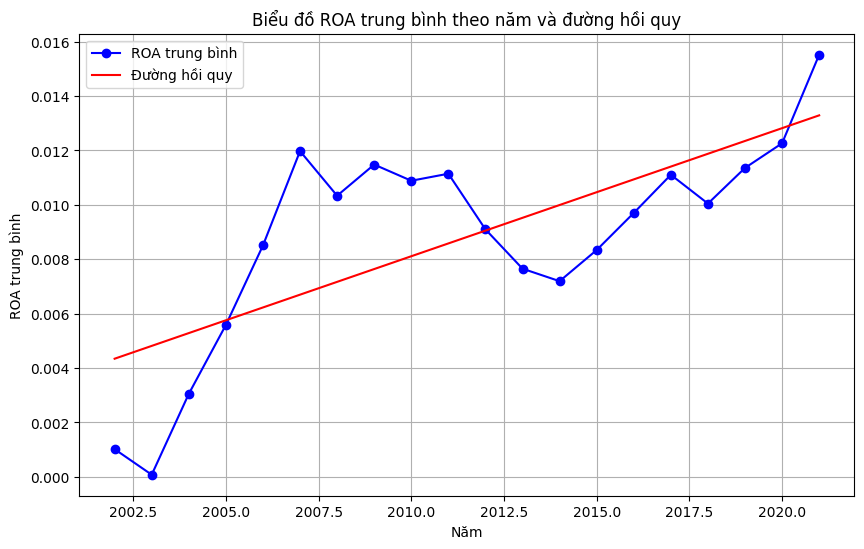

In [ ]:
# Vẽ biểu đồ ROA trung bình theo năm và đường hồi quy
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['ROA'], marker='o', color='b', label='ROA trung bình')
plt.plot(result_df['Year'], model.predict(X), color='r', label='Đường hồi quy')
plt.xlabel('Năm')
plt.ylabel('ROA trung bình')
plt.title('Biểu đồ ROA trung bình theo năm và đường hồi quy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Thêm cột Year^2 và Year^3 vào DataFrame
result_df["Year^2"] = (result_df["Year"] - 2000)** 2
result_df["Year^3"] = (result_df["Year"] - 2000) ** 3

# Tạo mô hình hồi quy đa thức bậc 3
X = result_df[["Year", "Year^2", "Year^3"]]
X = sm.add_constant(X).astype(float)
y = result_df["ROA"].astype(float)
model = sm.OLS(y, X).fit()

# In thông tin về mô hình hồi quy
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     37.02
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.99e-07
Time:                        02:38:05   Log-Likelihood:                 103.92
No. Observations:                  20   AIC:                            -199.8
Df Residuals:                      16   BIC:                            -195.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6959      1.613     -7.249      0.0

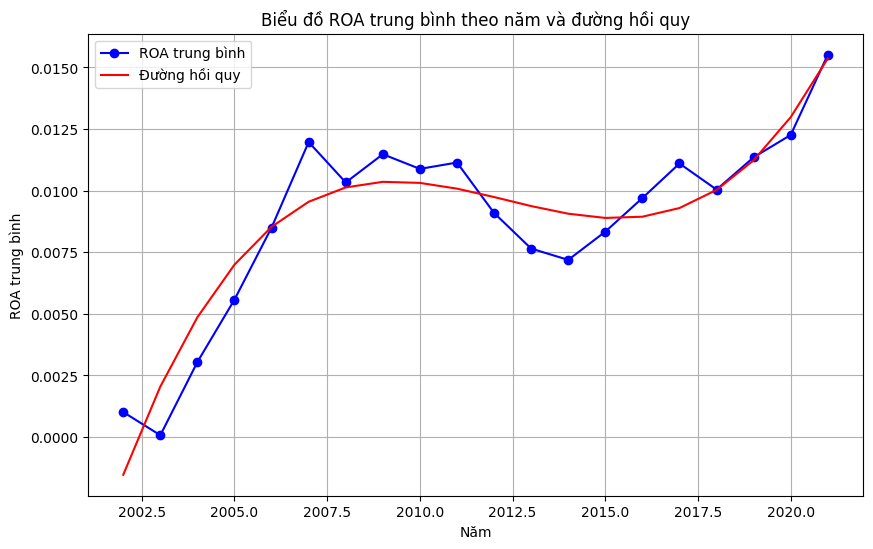

In [ ]:
# Vẽ biểu đồ ROA trung bình theo năm và đường hồi quy bậc 3
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['ROA'], marker='o', color='b', label='ROA trung bình')
plt.plot(result_df['Year'], model.predict(X), color='r', label='Đường hồi quy')
plt.xlabel('Năm')
plt.ylabel('ROA trung bình')
plt.title('Biểu đồ ROA trung bình theo năm và đường hồi quy')
plt.grid(True)
plt.legend()
plt.show()

## C2. Sự phát triển có giống nhau ở các nhóm ngân hàng? –  giả thuyết điều kiện và chính sách kinh tế từ 2002-2021 có thuận lợi cho tất cả các nhóm ngân hàng và Nhà nước tạo điều kiện cho các loại ngân hàng là như nhau.

In [ ]:
# df
banks_list = bank_codes_df.loc[:,["Bank Code","Type of ownership"]].dropna()
data_c2 = pd.merge(df,banks_list,how="left",on='Bank Code')
data_c2 = data_c2[(data_c2['Type of ownership'] =='JSCB')| (data_c2['Type of ownership'] =='SOCB')]
data_c2 = data_c2.dropna(subset = 'Returns Over Assets')
data_c2 =data_c2.rename(columns={'Returns Over Assets':'ROA','Bank Code':'Bcode','Type of ownership':"Type"})
data_c2['ROA'] = data_c2['ROA'].apply(pd.to_numeric)

In [ ]:
data_c2

,Bcode,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax,Type
0,ABB,2005,94,NaN,87.553191,NaN,0.001387,NaN,209317,188076,...,4.375891,6.863489,68.922299,39.94068,129.698018,4.38453,9445,11431,8230,JSCB
1,ABB,2006,309,14,41.016181,905.285714,0.004281,0.003501,1551159,1190274,...,1.064797,3.372963,75.997361,63.467204,127.408215,64.127534,508996,35287,12674,JSCB
2,ABB,2007,1123,54,144.05699,2995.851852,0.011123,0.013012,6776279,2479200,...,6.525331,3.168811,80.181379,59.601958,151.057977,-15.637631,526026,230793,161776,JSCB
3,ABB,2008,1345,70,36.948699,709.942857,0.010816,0.000354,6673746,3955514,...,1.256373,4.183087,95.808324,47.981036,97.016293,30.03161,3236046,65414,49696,JSCB
4,ABB,2009,1717,86,181.506698,3623.802326,0.012404,0.000427,15001842,4489436,...,6.941785,5.252149,76.390309,49.505832,87.509241,30.022448,2047227,412615,311647,JSCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,WEB,2008,404,61,245.960396,1628.983607,0.003249,0.000308,859372,1101678,...,9.019695,13.718481,47.946461,44.64603,138.580149,34.219728,NaN,138059,99368,JSCB
627,WEB,2009,594,71,201.180135,1683.112676,0.004291,0.000353,3309044,1136828,...,10.511792,1.948003,66.647576,81.491402,254.159661,-34.946482,NaN,160149,119501,JSCB
628,WEB,2010,763,71,66.952818,719.507042,0.004957,0.000342,5593260,1993434,...,2.562663,3.783109,91.458874,56.103623,93.935648,20.491398,NaN,67373,51085,JSCB
629,WEB,2011,874,76,138.169336,1588.947368,0.005051,0.004121,12629595,3162784,...,3.818155,8.1131,92.201092,33.554827,40.292329,61.685673,NaN,160559,120760,JSCB


Biểu đồ 2 nhóm Big4 và NonBig4 theo ROA và Year




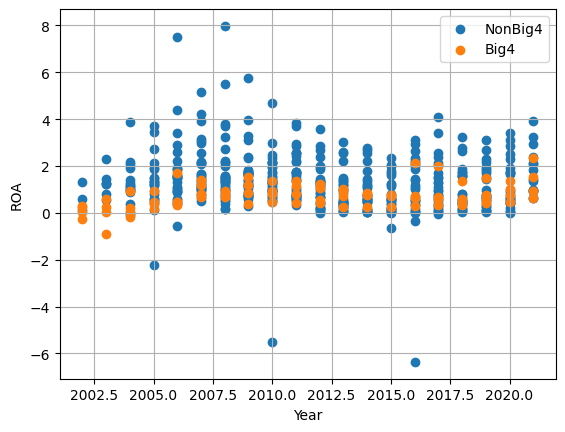

In [ ]:
fig, ax = plt.subplots()
Big4 = data_c2[data_c2['Type']=='SOCB']
NonBig4 = data_c2[data_c2['Type']=='JSCB']
ax.scatter(NonBig4['Year'], NonBig4['ROA'],label= 'NonBig4')
ax.scatter(Big4['Year'], Big4['ROA'],label= 'Big4' )
ax.legend()
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('ROA')
plt.show()

Anova giữa 2 nhóm Big4 và NonBig4 biến phụ thuộc là ROA biến độc lập là Year và bank grp(Big4 , NonBig4)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('ROA ~ C(Type)+ C(Year)+ C(Type):C(Year)',data=data_c2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Type),17.645637,1.0,15.118049,0.000113
C(Year),56.026226,19.0,2.526366,0.000390
C(Type):C(Year),7.391509,19.0,0.333302,0.996813
Residual,645.456095,553.0,NaN,NaN


Kết quả Anova cho thấy có sự khác nhau về ROA(lợi nhuận theo tài sản) giữa 2 nhóm Big4 và NonBig4 (p=0.000113) và có sự khác nhau giữa các năm (p=0.000390) nhưng không có sự tương tác , liên hệ giữa 2 biến Year và bank group.

## C3. Có sự khác biệt lớn trong cách vận hành giữa các ngân hàng không?

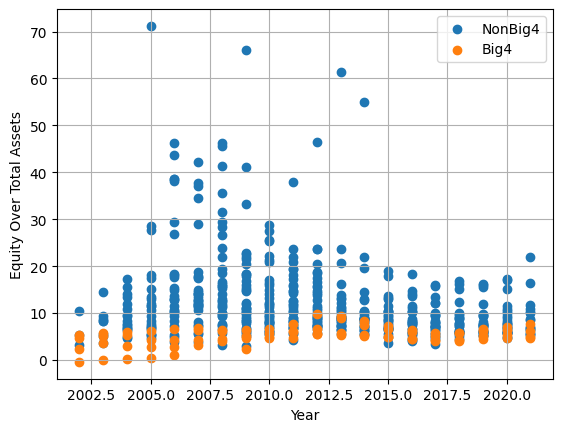

ANOVA result for Equity Over Total Assets:
             df        sum_sq      mean_sq          F        PR(>F)
Type        1.0   3356.730518  3356.730518  50.887972  2.852169e-12
Residual  595.0  39248.069186    65.963141        NaN           NaN


In [16]:
# ETA - Equity Over Total Assets
banks_list = bank_codes_df.loc[:,["Bank Code","Type of ownership"]].dropna()
data_c3_eta = pd.merge(df,banks_list,how="left",on='Bank Code')
data_c3_eta = data_c3_eta[(data_c3_eta['Type of ownership'] =='JSCB')| (data_c3_eta['Type of ownership'] =='SOCB')]
data_c3_eta = data_c3_eta.dropna(subset = 'Equity Over Total Assets')
data_c3_eta =data_c3_eta.rename(columns={'Equity Over Total Assets':'ETA','Bank Code':'Bcode','Type of ownership':"Type"})
data_c3_eta['ETA'] = data_c3_eta['ETA'].apply(pd.to_numeric)

fig, ax = plt.subplots()
Big4 = data_c3_eta[data_c3_eta['Type']=='SOCB']
NonBig4 = data_c3_eta[data_c3_eta['Type']=='JSCB']
ax.scatter(NonBig4['Year'], NonBig4['ETA'],label= 'NonBig4')
ax.scatter(Big4['Year'], Big4['ETA'],label= 'Big4' )
ax.legend()
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('Equity Over Total Assets')
plt.show()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols('ETA ~ Type', data=data_c3_eta).fit()
anova_result1 = sm.stats.anova_lm(model1)

print("ANOVA result for Equity Over Total Assets:")
print(anova_result1)

Dựa vào kết quả trên, ta có thể kết luận rằng giá trị p-value rất nhỏ (gần 0), thấp hơn ngưỡng ý nghĩa thông thường 0.05. Do đó, chúng ta có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm. Nghĩa là có sự khác biệt ý nghĩa về tỷ lệ "Equity Over Total Assets" giữa các nhóm Big4 và nonBig4.

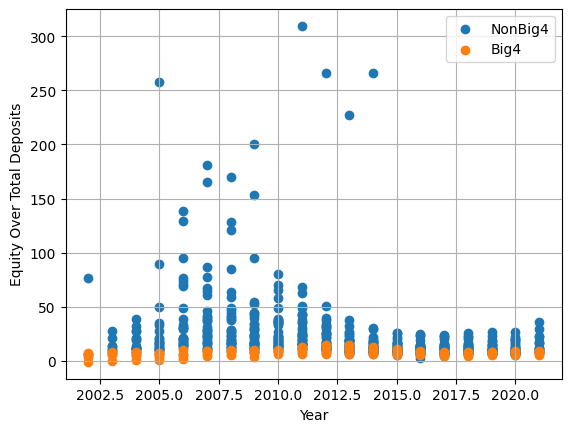

ANOVA result for Equity Over Total Deposits:
             df         sum_sq       mean_sq          F    PR(>F)
Type        1.0   22049.431394  22049.431394  22.919297  0.000002
Residual  599.0  576265.899736    962.046577        NaN       NaN


In [17]:
# ETA - Equity Over Total Deposits
data_c3_etd = pd.merge(df,banks_list,how="left",on='Bank Code')
data_c3_etd = data_c3_etd[(data_c3_etd['Type of ownership'] =='JSCB')| (data_c3_etd['Type of ownership'] =='SOCB')]
data_c3_etd = data_c3_etd.dropna(subset = 'Equity Over Total Deposits')
data_c3_etd =data_c3_etd.rename(columns={'Equity Over Total Deposits':'ETD','Bank Code':'Bcode','Type of ownership':"Type"})
data_c3_etd['ETD'] = data_c3_etd['ETD'].apply(pd.to_numeric)

fig, ax = plt.subplots()
Big4 = data_c3_etd[data_c3_etd['Type']=='SOCB']
NonBig4 = data_c3_etd[data_c3_etd['Type']=='JSCB']
ax.scatter(NonBig4['Year'], NonBig4['ETD'],label= 'NonBig4')
ax.scatter(Big4['Year'], Big4['ETD'],label= 'Big4' )
ax.legend()
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('Equity Over Total Deposits')
plt.show()

model1 = ols('ETD ~ Type', data=data_c3_etd).fit()
anova_result1 = sm.stats.anova_lm(model1)

print("ANOVA result for Equity Over Total Deposits:")
print(anova_result1)

Dựa vào kết quả trên, ta có thể kết luận rằng giá trị p-value rất nhỏ (gần 0), thấp hơn ngưỡng ý nghĩa thông thường 0.05. Do đó, chúng ta có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm. Nghĩa là có sự khác biệt ý nghĩa về tỷ lệ "Equity Over Total Deposits" giữa các nhóm Big4 và nonBig4

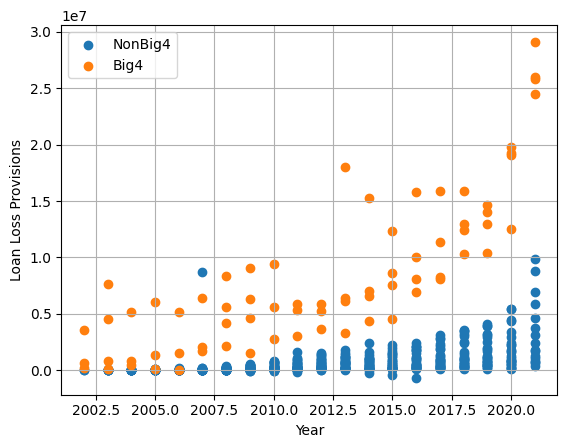

ANOVA result for Loan Loss Provisions:
             df        sum_sq       mean_sq           F        PR(>F)
Type        1.0  3.724298e+15  3.724298e+15  553.783324  1.369766e-86
Residual  583.0  3.920785e+15  6.725189e+12         NaN           NaN


In [18]:
# LLP - Loan Loss Provisions
data_c3_llp = pd.merge(df,banks_list,how="left",on='Bank Code')
data_c3_llp = data_c3_llp[(data_c3_llp['Type of ownership'] =='JSCB')| (data_c3_llp['Type of ownership'] =='SOCB')]
data_c3_llp = data_c3_llp.dropna(subset = 'Loan Loss Provisions  ')
data_c3_llp =data_c3_llp.rename(columns={'Loan Loss Provisions  ':'LLP','Bank Code':'Bcode','Type of ownership':"Type"})
data_c3_llp['LLP'] = data_c3_llp['LLP'].apply(pd.to_numeric)

fig, ax = plt.subplots()
Big4 = data_c3_llp[data_c3_llp['Type']=='SOCB']
NonBig4 = data_c3_llp[data_c3_llp['Type']=='JSCB']
ax.scatter(NonBig4['Year'], NonBig4['LLP'],label= 'NonBig4')
ax.scatter(Big4['Year'], Big4['LLP'],label= 'Big4' )
ax.legend()
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('Loan Loss Provisions')
plt.show()

model1 = ols('LLP ~ Type', data=data_c3_llp).fit()
anova_result1 = sm.stats.anova_lm(model1)

print("ANOVA result for Loan Loss Provisions:")
print(anova_result1)

Dựa vào kết quả trên, giá trị p-value rất nhỏ (gần 0), thấp hơn ngưỡng ý nghĩa thông thường 0.05. Do đó, chúng ta có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm. Nghĩa là có sự khác biệt ý nghĩa về tỷ lệ "Loan Loss Provisions" giữa các nhóm Big4 và nonBig4.

553


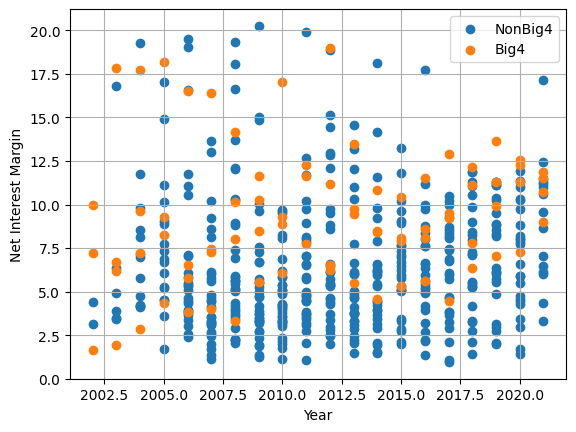

ANOVA result for Net Interest Margin:
             df       sum_sq     mean_sq        F        PR(>F)
Type        1.0   547.482049  547.482049  39.0398  8.315041e-10
Residual  551.0  7727.053047   14.023690      NaN           NaN


In [69]:
# LLP - Loan Loss Provisions
data_c3_llp = pd.merge(df,banks_list,how="left",on='Bank Code')
data_c3_llp = data_c3_llp[(data_c3_llp['Type of ownership'] =='JSCB')| (data_c3_llp['Type of ownership'] =='SOCB')]
data_c3_llp = data_c3_llp.dropna(subset = 'Net Interest Margin')
data_c3_llp =data_c3_llp.rename(columns={'Net Interest Margin':'LLP','Bank Code':'Bcode','Type of ownership':"Type"})
data_c3_llp['LLP'] = data_c3_llp['LLP'].apply(pd.to_numeric)

# Cắt tỉa trực tiếp trên dữ liệu của bảng data_c3_llp
alpha = 0.05
q1 = data_c3_llp['LLP'].quantile(0.05)
q3 = data_c3_llp['LLP'].quantile(0.95)
iqr = q3 - q1
lower_bound = q1 - alpha * iqr
upper_bound = q3 + alpha * iqr

#data_c3_llp = data_c3_llp[(data_c3_llp['LLP'] >= -1) & (data_c3_llp['LLP'] <= 101)]
data_c3_llp = data_c3_llp[(data_c3_llp['LLP'] >= lower_bound) & (data_c3_llp['LLP'] <= upper_bound)]

print(len(data_c3_llp))

fig, ax = plt.subplots()
Big4 = data_c3_llp[data_c3_llp['Type']=='SOCB']
NonBig4 = data_c3_llp[data_c3_llp['Type']=='JSCB']
ax.scatter(NonBig4['Year'], NonBig4['LLP'],label= 'NonBig4')
ax.scatter(Big4['Year'], Big4['LLP'],label= 'Big4' )
ax.legend()
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('Net Interest Margin')
plt.show()

model1 = ols('LLP ~ Type', data=data_c3_llp).fit()
anova_result1 = sm.stats.anova_lm(model1)

print("ANOVA result for Net Interest Margin:")
print(anova_result1)

In [ ]:
# Lọc dữ liệu cho các ngân hàng AGB, BIDV, CTG, VCB
selected_banks = ['AGB', 'BIDV', 'CTG', 'VCB']
filtered_data = df[df['Bank Code'].isin(selected_banks)]

# Tạo một DataFrame mới để lưu trữ thông tin thứ tự (thứ bậc)
rank_data = pd.DataFrame()

# Duyệt qua từng năm
years = filtered_data['Year'].unique()
for year in years:
    year_data = filtered_data[filtered_data['Year'] == year]
    year_data_sorted = year_data.sort_values(by='Total Deposits Ratio', ascending=False)
    year_data_sorted['Rank'] = range(1, len(year_data_sorted) + 1)
    rank_data = pd.concat([rank_data, year_data_sorted])

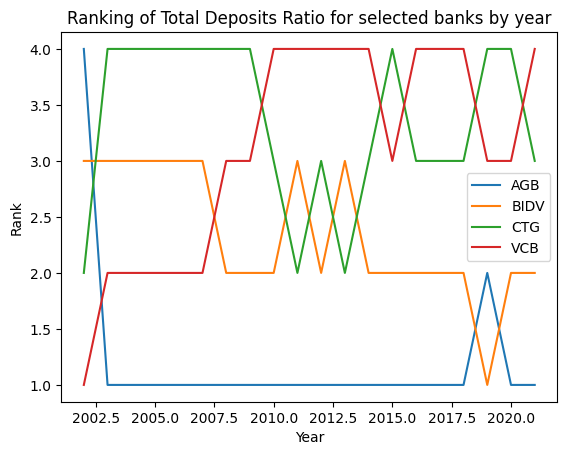

In [60]:
# Vẽ biểu đồ đường cho từng ngân hàng theo từng năm
for bank in selected_banks:
    bank_data = rank_data[rank_data['Bank Code'] == bank]
    plt.plot(bank_data['Year'], bank_data['Rank'], label=bank)

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Ranking of Total Deposits Ratio for selected banks by year')
plt.legend()
plt.show()



## C4. Liệu khủng hoảng kinh tế 2008-2009 có ảnh hướng tới các ngân hàng không và nếu có thì trong bao lâu sẽ hồi phục?

In [ ]:
total_profits_by_year = df.groupby('Year')['Profits After Tax'].sum()

# Hiển thị kết quả
result_df = pd.DataFrame({'Year': total_profits_by_year.index,
                          'Total Profits After Tax': total_profits_by_year})

In [ ]:
display(result_df["Total Profits After Tax"])

Year
2002       329561
2003        31744
2004      1744248
2005      4052565
2006      8424790
2007     18095675
2008     19337194
2009     29832066
2010     39308344
2011     47256749
2012     40425964
2013     38033882
2014     39918934
2015     53482819
2016     70025006
2017     95035144
2018     92262948
2019    118906165
2020    143457931
2021    175927165
Name: Total Profits After Tax, dtype: object

In [ ]:
import statsmodels.api as sm

X = result_df["Year"]
y = result_df["Total Profits After Tax"].astype(float)
# Thêm hằng số vào dữ liệu X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In thông tin về mô hình hồi quy
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Total Profits After Tax   R-squared:                       0.853
Model:                                 OLS   Adj. R-squared:                  0.845
Method:                      Least Squares   F-statistic:                     104.5
Date:                     Fri, 28 Jul 2023   Prob (F-statistic):           6.34e-09
Time:                             02:39:20   Log-Likelihood:                -363.23
No. Observations:                       20   AIC:                             730.5
Df Residuals:                           18   BIC:                             732.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

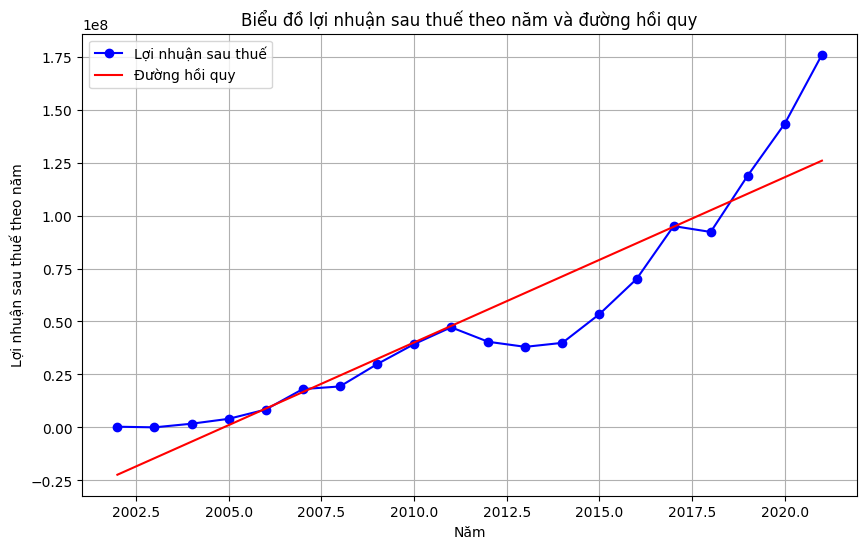

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(result_df['Year'], result_df['Total Profits After Tax'], marker='o', color='b', label='Lợi nhuận sau thuế')
plt.plot(result_df['Year'], model.predict(X), color='r', label='Đường hồi quy')
plt.xlabel('Năm')
plt.ylabel('Lợi nhuận sau thuế theo năm')
plt.title('Biểu đồ lợi nhuận sau thuế theo năm và đường hồi quy')
plt.grid(True)
plt.legend()
plt.show()

## C5. Dịch COVID có ảnh hưởng đến doanh thu / lợi nhuận của các ngân hàng trong giai đoạn này (2020 - 2021)?

Ta quan tâm đến các cột `Total Income` và `Profits After Tax` trên dữ liệu.

In [ ]:
df_cau5 = df[["Bank Code", "Year", "Total Income", "Profits After Tax"]].dropna()

In [ ]:
df_cau5

,Bank Code,Year,Total Income,Profits After Tax
1,ABB,2005,36782,8230
2,ABB,2006,147013,12674
3,ABB,2007,1164526,161776
4,ABB,2008,1560569,49696
5,ABB,2009,1747651,311647
...,...,...,...,...
627,WEB,2008,265225,99368
628,WEB,2009,480172,119501
629,WEB,2010,788807,51085
630,WEB,2011,2058737,120760


Ở đây có vài nhận xét:

- Ta chỉ quan tâm đến các ngân hàng còn tồn tại sau các đợt sáp nhập. Vì vậy ta loại bỏ các ngân hàng không có doanh thu / lợi nhuận từ năm 2020 - 2021.
- Tương tự bên trên, ta cũng không xét các ngân hàng thuộc nhóm PB (ngân hàng chính sách) và FOCB.

Vì vậy, ở đây ta tiến hành khảo sát trên các ngân hàng thuộc nhóm JSCB và SOCB. Ta cũng tiến hành khảo sát trên 2 nhóm Big4 (BIDV, VCB, CGT và AGB) và nhóm ngân hàng cổ phần còn lại.

In [ ]:
eligible_codes = []

for code in bank_codes:
    has_2020 = (len(df_cau5[(df_cau5["Bank Code"] == code) & (df_cau5["Year"] == 2020)])) == 1
    has_2021 = (len(df_cau5[(df_cau5["Bank Code"] == code) & (df_cau5["Year"] == 2021)])) == 1
    is_not_FOCB = code not in focb_code.to_list()
    is_not_pb = code not in pb_code.to_list()

    if has_2020 & has_2021 & is_not_FOCB & is_not_pb:
        eligible_codes.append(code)

In [ ]:
df_cau5 = df_cau5[df_cau5["Bank Code"].isin(eligible_codes)]

In [ ]:
df_cau5

,Bank Code,Year,Total Income,Profits After Tax
1,ABB,2005,36782,8230
2,ABB,2006,147013,12674
3,ABB,2007,1164526,161776
4,ABB,2008,1560569,49696
5,ABB,2009,1747651,311647
...,...,...,...,...
616,VPB,2017,32965007,6440767
617,VPB,2018,38299985,7355568
618,VPB,2019,45230603,8260263
619,VPB,2020,48443836,10413760


In [ ]:
df_cau5_big4 = df_cau5[df_cau5["Bank Code"].isin(big4)]
df_cau5_rest = df_cau5[~df_cau5["Bank Code"].isin(big4)]

### Doanh thu và lợi nhuận của nhóm Big4 trong giai đoạn COVID

Trực quan hóa dữ liệu doanh thu của các ngân hàng thuộc nhóm Big4 từ 2002-2021:

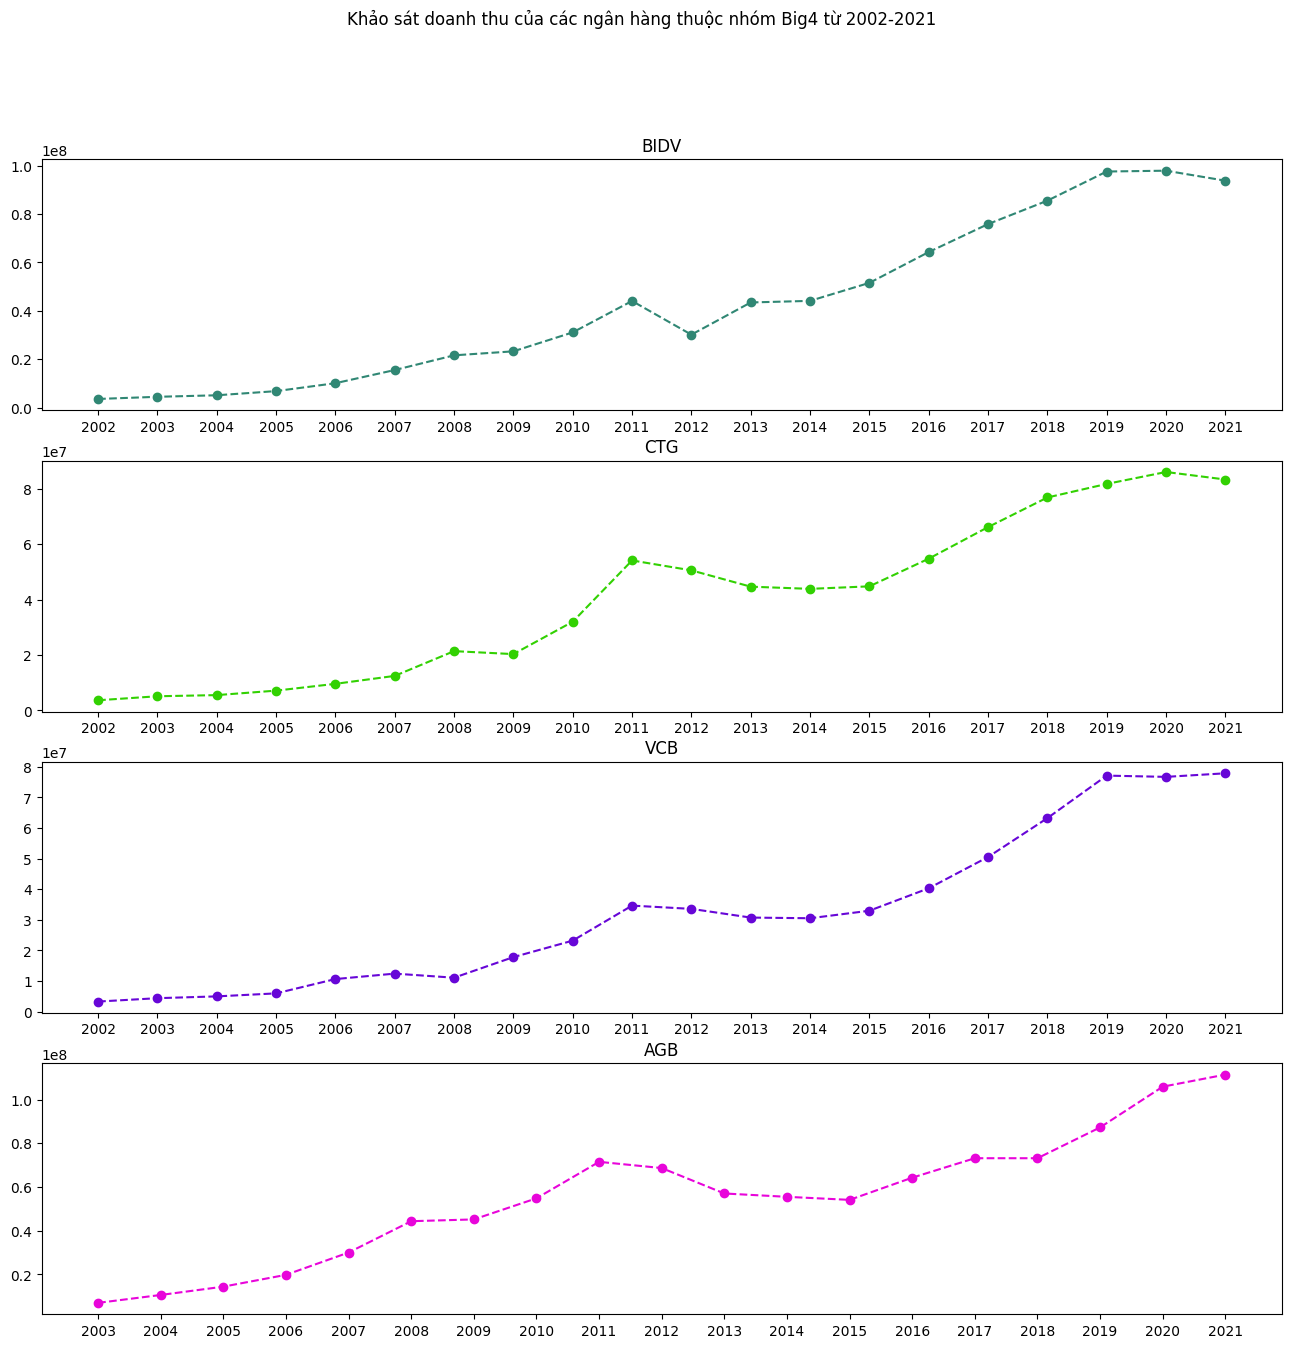

In [ ]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(big4))]

fig, ax = plt.subplots(4,1,figsize=(16,15))

plt.setp(ax, xticks=[i for i in range(2002, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].plot(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Total Income'].tolist(),
               c=details[1],
               linestyle='dashed',
               marker='o')
    ax[i].set_title(details[0])

plt.suptitle("Khảo sát doanh thu của các ngân hàng thuộc nhóm Big4 từ 2002-2021")
plt.show()

Vì dịch COVID bắt đầu từ cuối năm 2019 - 2021, ta cần xem xét 5 năm cuối trong dữ liệu này:

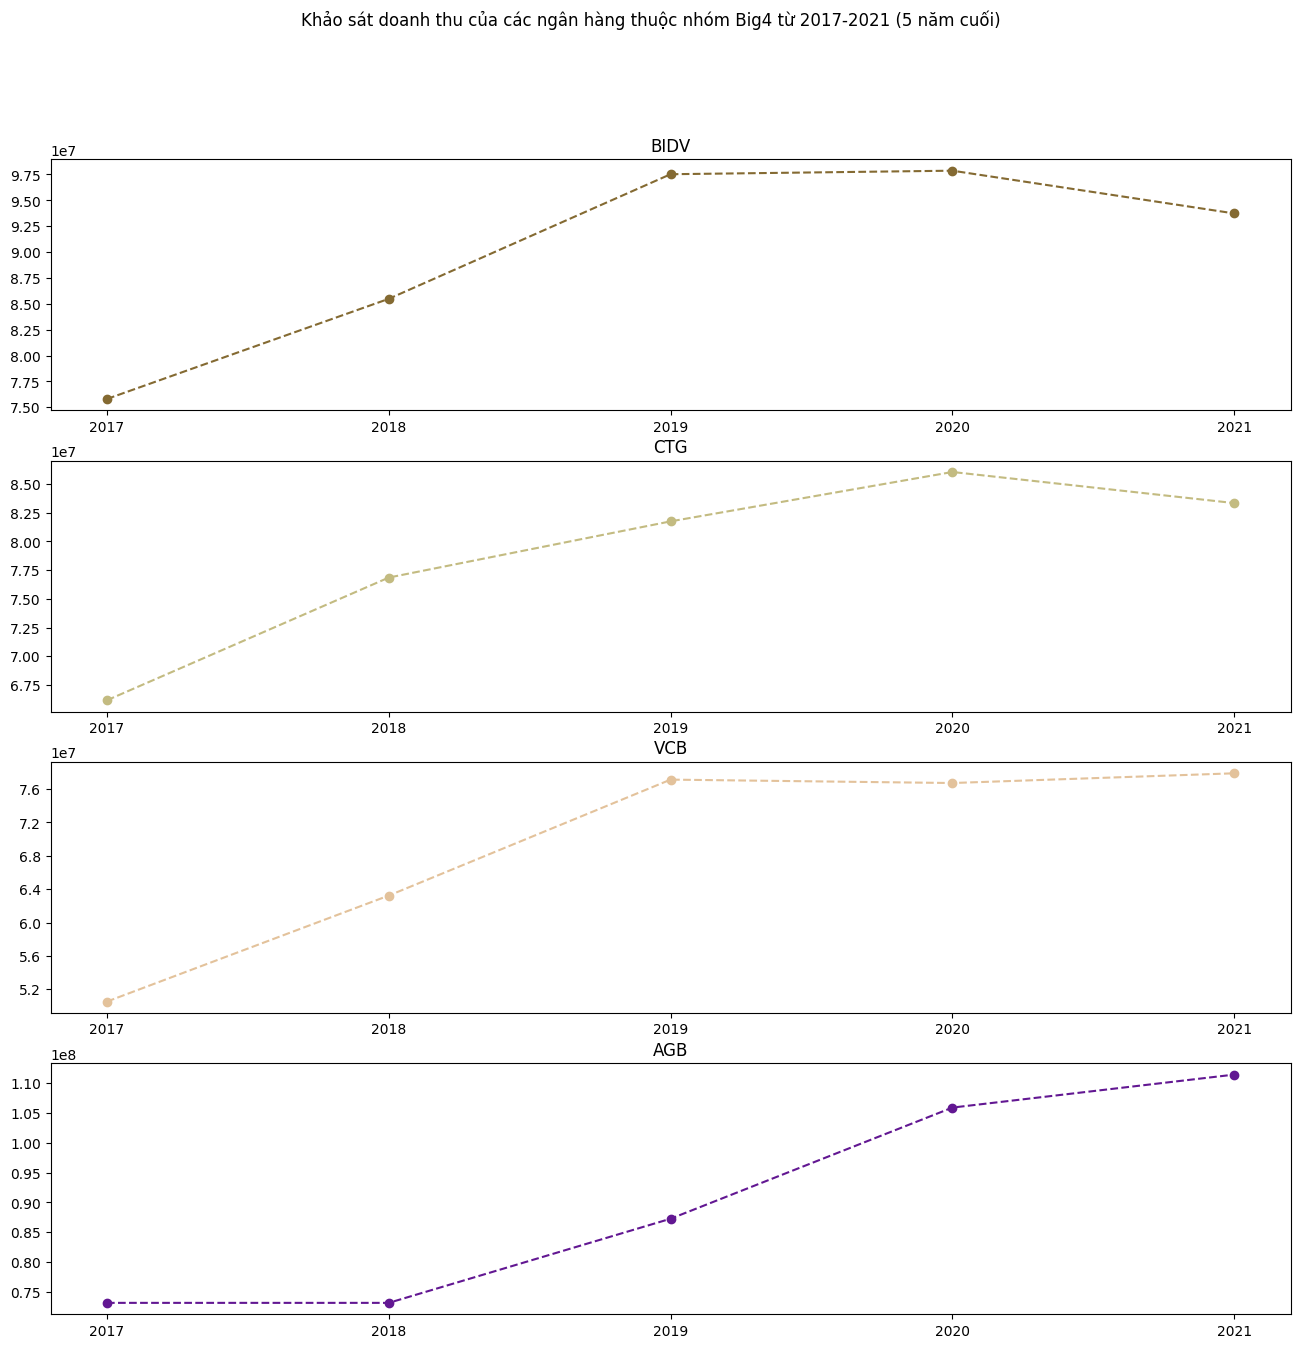

In [ ]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(big4))]

fig, ax = plt.subplots(4,1,figsize=(16,15))

plt.setp(ax, xticks=[i for i in range(2016, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].plot(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'][-5:].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Total Income'][-5:].tolist(),
               c=details[1],
               linestyle='dashed',
               marker='o')
    ax[i].set_title(details[0])

    ya = ax[i].get_yaxis()
    ya.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))

plt.suptitle("Khảo sát doanh thu của các ngân hàng thuộc nhóm Big4 từ 2017-2021 (5 năm cuối)")
plt.show()

Có thể thấy, doanh thu của nhóm Big4 không đồng đều nhau ở giai đoạn COVID (cuối 2019 - 2021). Ngoại trừ AGB (Agribank) tăng doanh thu 3 năm liên tiếp, các ngân hàng còn lại trong nhóm Big4 (BIDV, Vietcombank và Vietinbank) thể hiện dấu hiệu suy giảm doanh thu nhẹ.

Ta tính toán cụ thể tăng giảm của doanh thu nhóm Big4 trong giai đoạn này:

In [ ]:
df_cau5_big4["delta_income"] = df_cau5_big4.groupby("Bank Code")["Total Income"].diff()

<ipython-input-49-088b955365ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau5_big4["delta_income"] = df_cau5_big4.groupby("Bank Code")["Total Income"].diff()


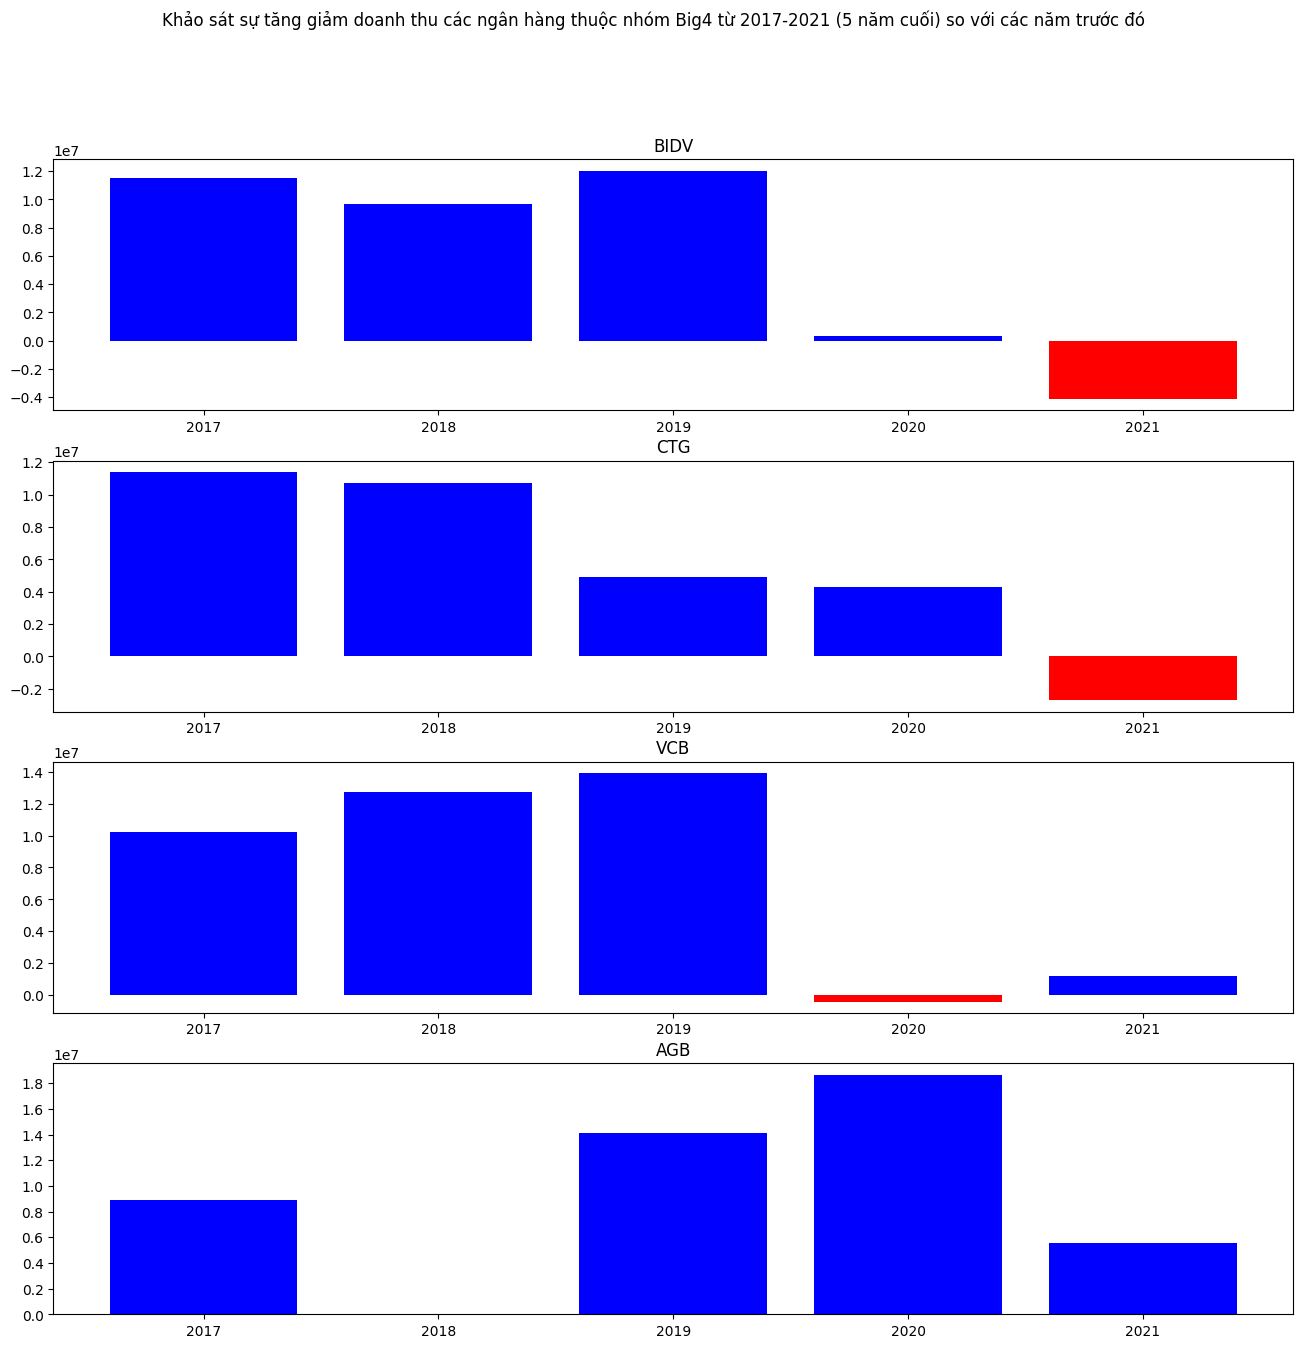

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(16,15))
plt.setp(ax, xticks=[i for i in range(2016, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].bar(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'][-5:].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['delta_income'][-5:].tolist(),
              color=['r' if x < 0 else 'b' for x in df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['delta_income'][-5:].tolist()])
    ax[i].set_title(details[0])

    ya = ax[i].get_yaxis()
    ya.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))

plt.suptitle("Khảo sát sự tăng giảm doanh thu các ngân hàng thuộc nhóm Big4 từ 2017-2021 (5 năm cuối) so với các năm trước đó")
plt.show()

Theo đó, BIDV và CTG có mức doanh thu giảm liên tiếp trong các năm 2019 - 2020 và 2021. VCB sụt giảm doanh thu trong năm 2020, sau đó có tăng trưởng nhẹ; còn AGB thể hiện mức tăng doanh thu liên tục từ 2019 - 2021.

Tương tự với lợi nhuận sau thuế, ta tiến hành trực quan hóa lợi nhuận sau thuế của nhóm Big4:

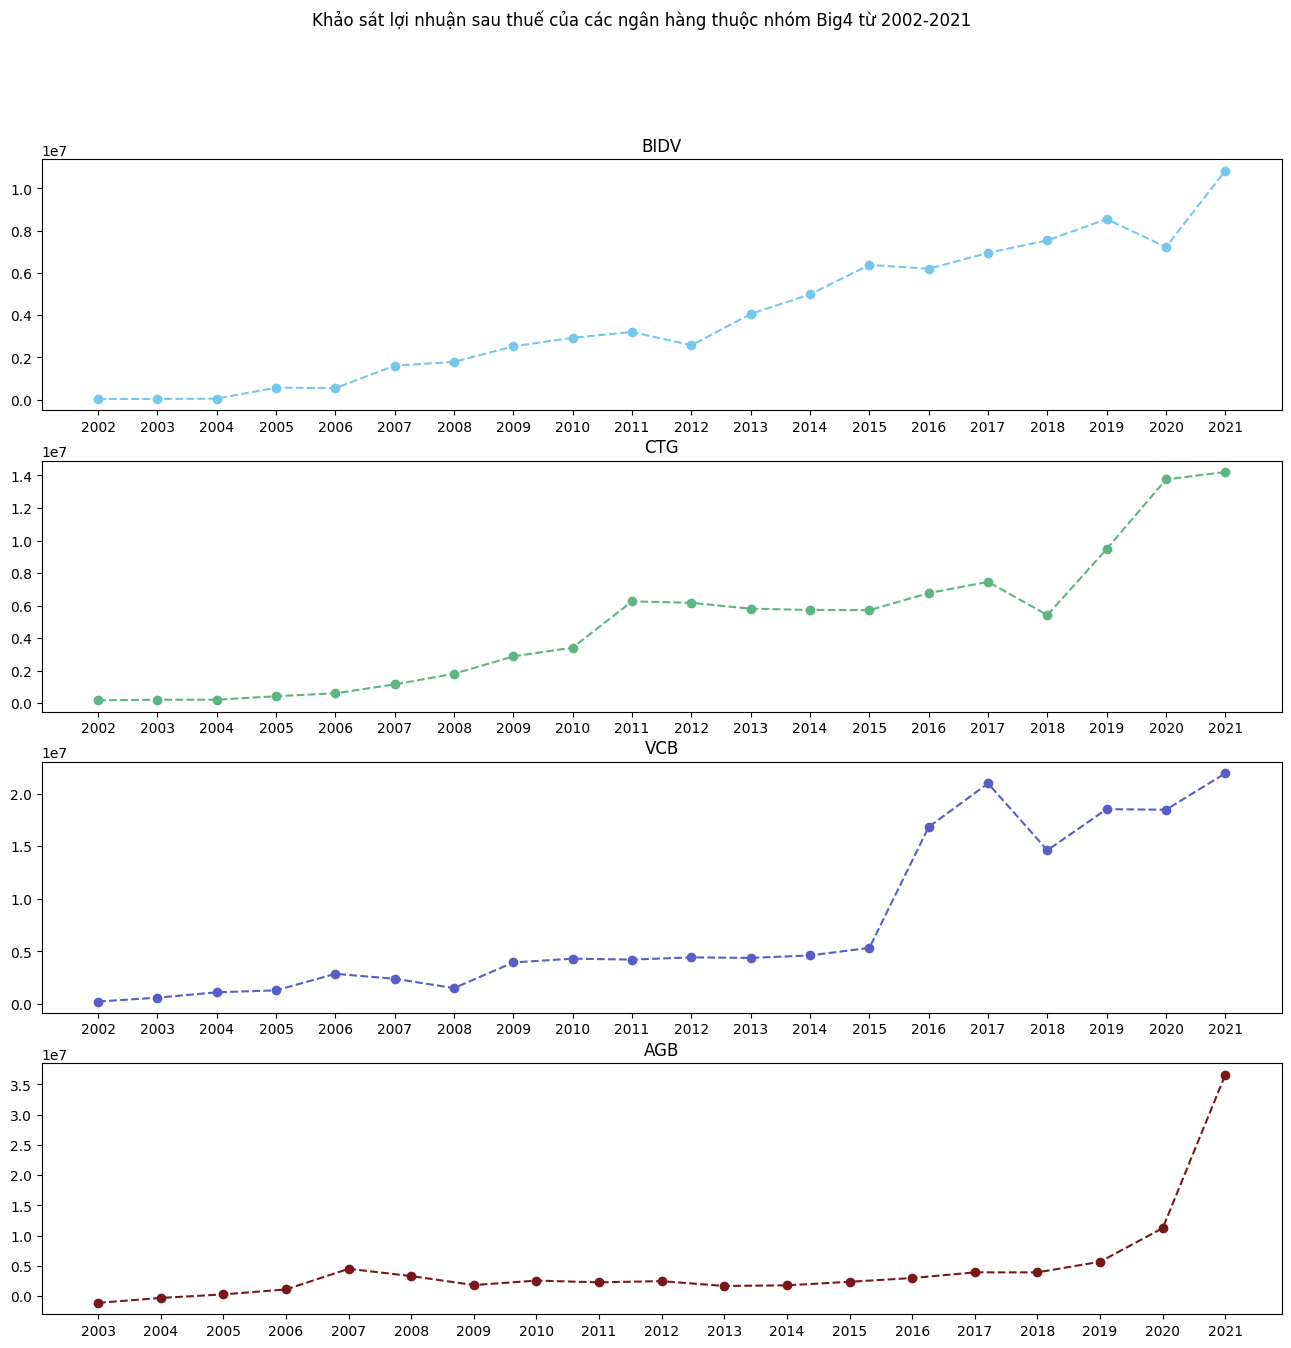

In [ ]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(big4))]

fig, ax = plt.subplots(4,1,figsize=(16,15))

plt.setp(ax, xticks=[i for i in range(2002, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].plot(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Profits After Tax'].tolist(),
               c=details[1],
               linestyle='dashed',
               marker='o')
    ax[i].set_title(details[0])

plt.suptitle("Khảo sát lợi nhuận sau thuế của các ngân hàng thuộc nhóm Big4 từ 2002-2021")
plt.show()

Và dữ liệu 5 năm cuối

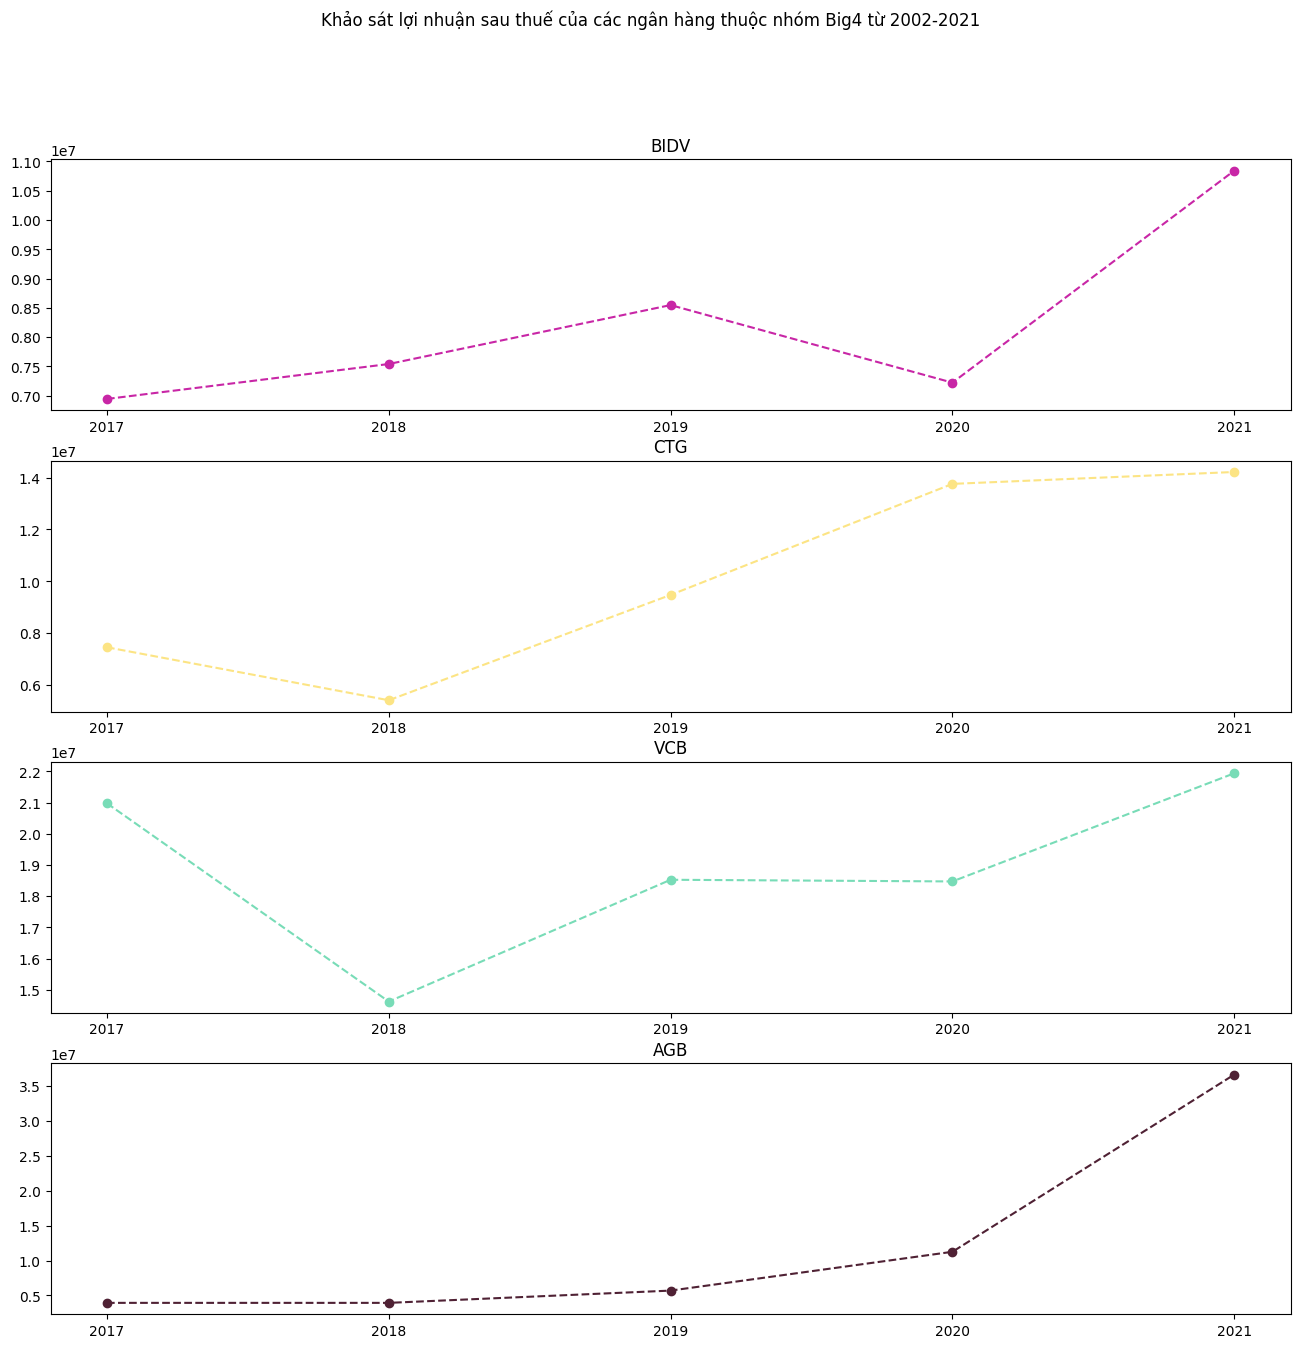

In [ ]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(big4))]

fig, ax = plt.subplots(4,1,figsize=(16,15))

plt.setp(ax, xticks=[i for i in range(2017, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].plot(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'][-5:].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Profits After Tax'][-5:].tolist(),
               c=details[1],
               linestyle='dashed',
               marker='o')
    ax[i].set_title(details[0])

plt.suptitle("Khảo sát lợi nhuận sau thuế của các ngân hàng thuộc nhóm Big4 từ 2002-2021")
plt.show()

Ta cũng tính toán cụ thể tăng giảm của lợi nhuận sau thuế nhóm Big4 trong giai đoạn này:

In [ ]:
df_cau5_big4["delta_profit_after_tax"] = df_cau5_big4.groupby("Bank Code")["Profits After Tax"].diff()

<ipython-input-53-1da1420c679a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau5_big4["delta_profit_after_tax"] = df_cau5_big4.groupby("Bank Code")["Profits After Tax"].diff()


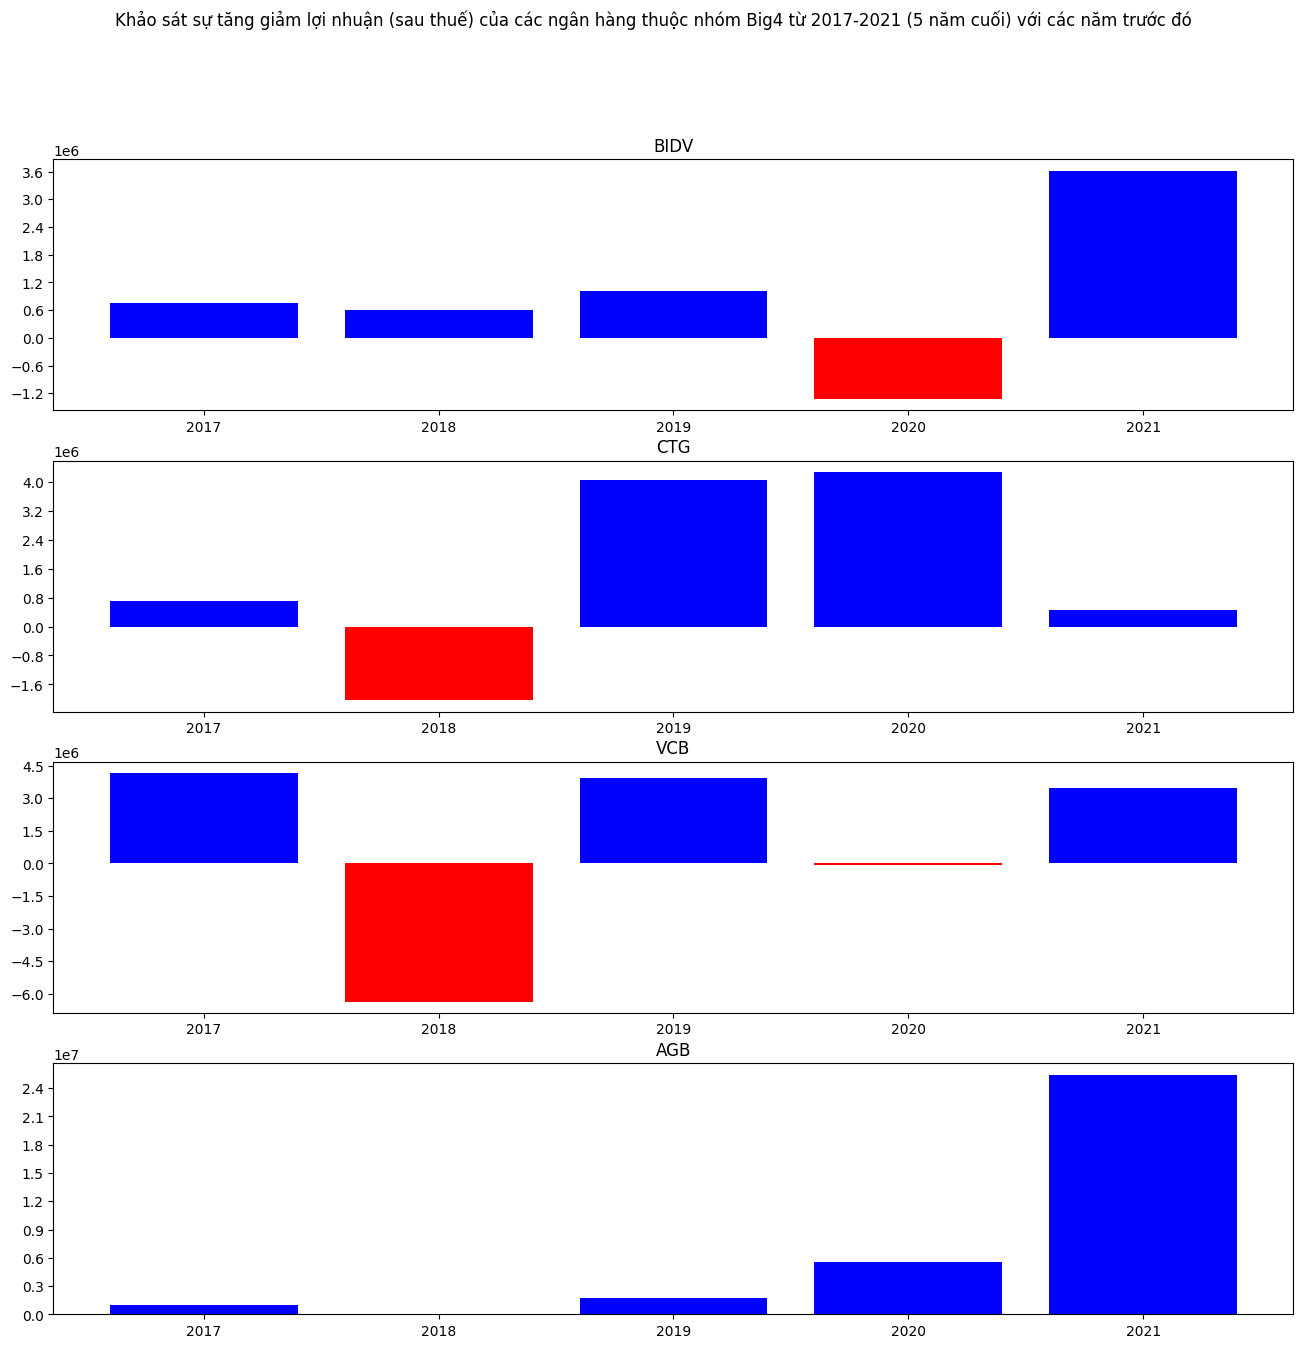

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(16,15))
plt.setp(ax, xticks=[i for i in range(2016, 2022)])

for i, details in enumerate(zip(big4, colors)):
    ax[i].bar(df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['Year'][-5:].tolist(),
               df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['delta_profit_after_tax'][-5:].tolist(),
              color=['r' if x < 0 else 'b' for x in df_cau5_big4[df_cau5_big4['Bank Code'] == details[0]]['delta_profit_after_tax'][-5:].tolist()])
    ax[i].set_title(details[0])

    ya = ax[i].get_yaxis()
    ya.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))

plt.suptitle("Khảo sát sự tăng giảm lợi nhuận (sau thuế) của các ngân hàng thuộc nhóm Big4 từ 2017-2021 (5 năm cuối) với các năm trước đó")
plt.show()

Có thể thấy, các ngân hàng thuộc nhóm Big4 đều tăng lợi nhuận vào năm 2021, tuy nhiên xét trên khoảng thời gian dịch COVID (2019-2021) thì nhóm ngân hàng Big4 có mức tăng không đồng đều. Ngoại trừ AGB tăng lợi nhuận liên tiếp, các ngân hàng khác thuộc Big4 đều trải qua một giai đoạn sụt giảm lợi nhuận hoặc có mức lợi nhuận tăng ít hơn so với cùng kì.

Ta có thể giải thích một phần nguyên nhân này là do AGB ít tham gia các hoạt động liên quan đến xuất nhập khẩu mà chỉ hướng đến nhóm khách hàng là nông dân - người lao động. Do vậy, AGB ít chịu ảnh hưởng của sự đình trệ trong giao thương do dịch COVID, từ đó giữ được lợi nhuận và doanh thu ổn định.

### Doanh thu và lợi nhuận của các ngân hàng ngoài Big4 trong giai đoạn COVID

In [ ]:
df_cau5_rest

,Bank Code,Year,Total Income,Profits After Tax
1,ABB,2005,36782,8230
2,ABB,2006,147013,12674
3,ABB,2007,1164526,161776
4,ABB,2008,1560569,49696
5,ABB,2009,1747651,311647
...,...,...,...,...
616,VPB,2017,32965007,6440767
617,VPB,2018,38299985,7355568
618,VPB,2019,45230603,8260263
619,VPB,2020,48443836,10413760


Ta cũng tiến hành tính toán mức tăng lợi nhuận và doanh thu trong 5 năm cuối:

In [ ]:
df_cau5_rest["delta_income"] = df_cau5_rest.groupby("Bank Code")["Total Income"].diff()
df_cau5_rest["delta_profit_after_tax"] = df_cau5_rest.groupby("Bank Code")["Profits After Tax"].diff()

<ipython-input-56-10241be834ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau5_rest["delta_income"] = df_cau5_rest.groupby("Bank Code")["Total Income"].diff()
<ipython-input-56-10241be834ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau5_rest["delta_profit_after_tax"] = df_cau5_rest.groupby("Bank Code")["Profits After Tax"].diff()


In [ ]:
df_cau5_rest_observe = df_cau5_rest[df_cau5_rest["Year"] >= 2017]

In [ ]:
df_cau5_rest_observe

,Bank Code,Year,Total Income,Profits After Tax,delta_income,delta_profit_after_tax
13,ABB,2017,5550294,488836,1137026,244922
14,ABB,2018,6281720,714907,731426,226071
15,ABB,2019,7479226,1000675,1197506,285768
16,ABB,2020,7798815,1117657,319589,116982
17,ABB,2021,7514646,1559978,-284169,442321
...,...,...,...,...,...,...
616,VPB,2017,32965007,6440767,9456864,2505722
617,VPB,2018,38299985,7355568,5334978,914801
618,VPB,2019,45230603,8260263,6930618,904695
619,VPB,2020,48443836,10413760,3213233,2153497


In [ ]:
not_big4_labels = df_cau5_rest_observe["Bank Code"].unique()

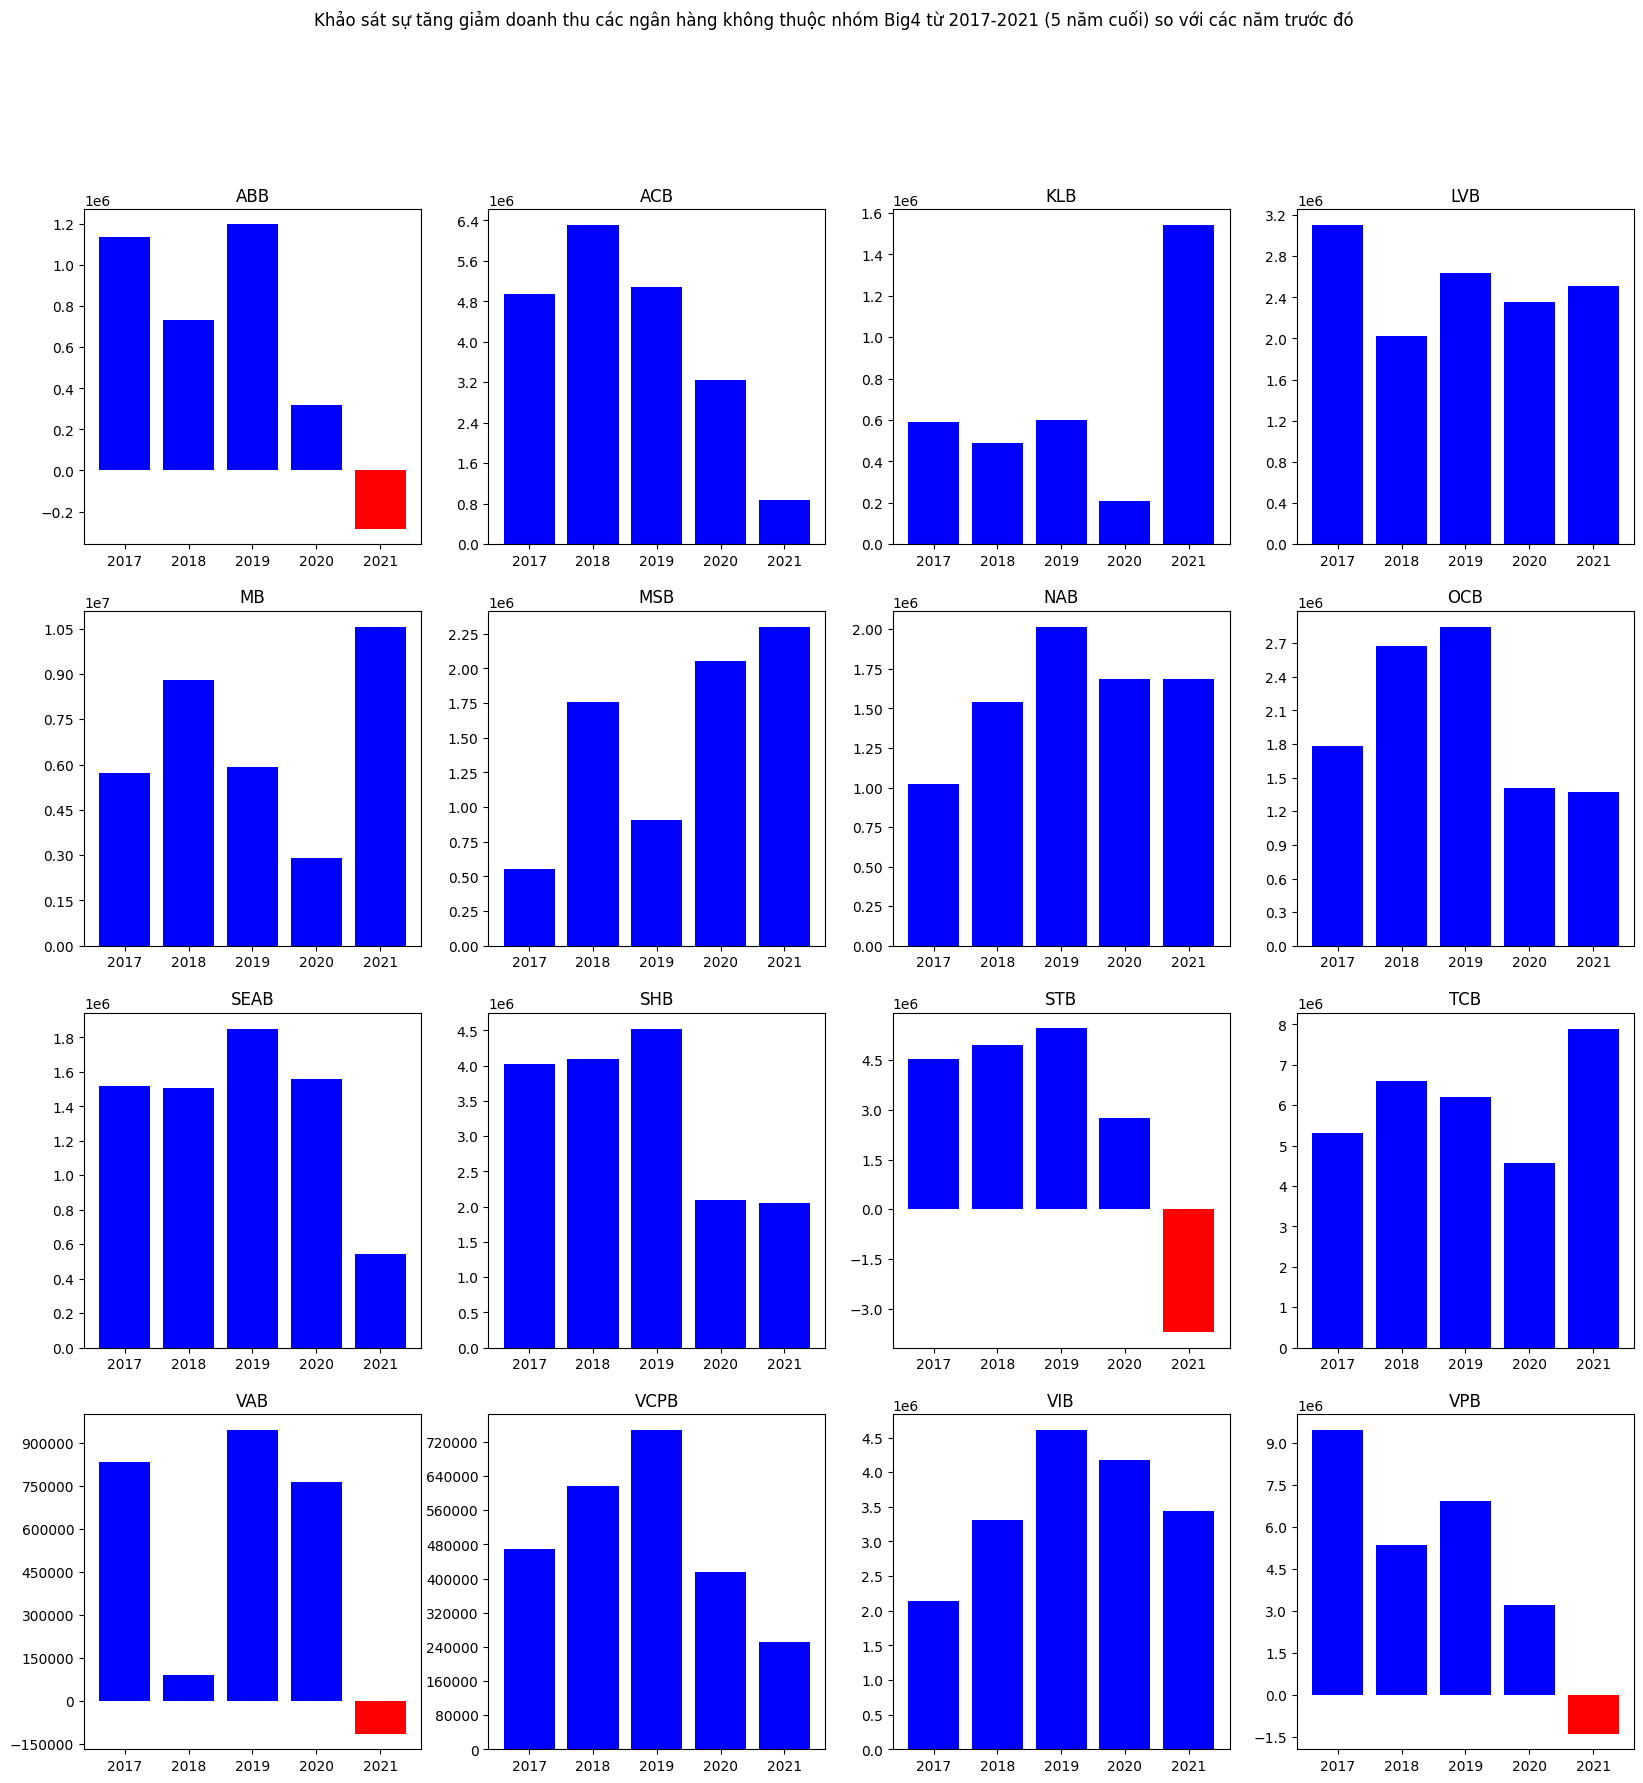

In [ ]:
cols = 4
fig, ax = plt.subplots(len(not_big4_labels) // cols,cols,figsize=(20,20))
plt.setp(ax, xticks=[i for i in range(2016, 2022)])

cnt=0
for a in range(len(not_big4_labels) // cols):
    for b in range(0, cols):
        ax[a, b].bar(df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['Year'][-5:].tolist(),
                    df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['delta_income'][-5:].tolist(),
                    color=['r' if x < 0 else 'b' for x in df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['delta_income'][-5:].tolist()])
        ax[a, b].set_title(not_big4_labels[cnt])

        ya = ax[a, b].get_yaxis()
        ya.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
        cnt+=1

plt.suptitle("Khảo sát sự tăng giảm doanh thu các ngân hàng không thuộc nhóm Big4 từ 2017-2021 (5 năm cuối) so với các năm trước đó")
plt.show()

Ngoại trừ các ngân hàng VPB, VAB, STB và ABB, các ngân hàng còn lại đều có mức doanh thu tăng trong năm 2021 cũng như 5 năm trước đó.

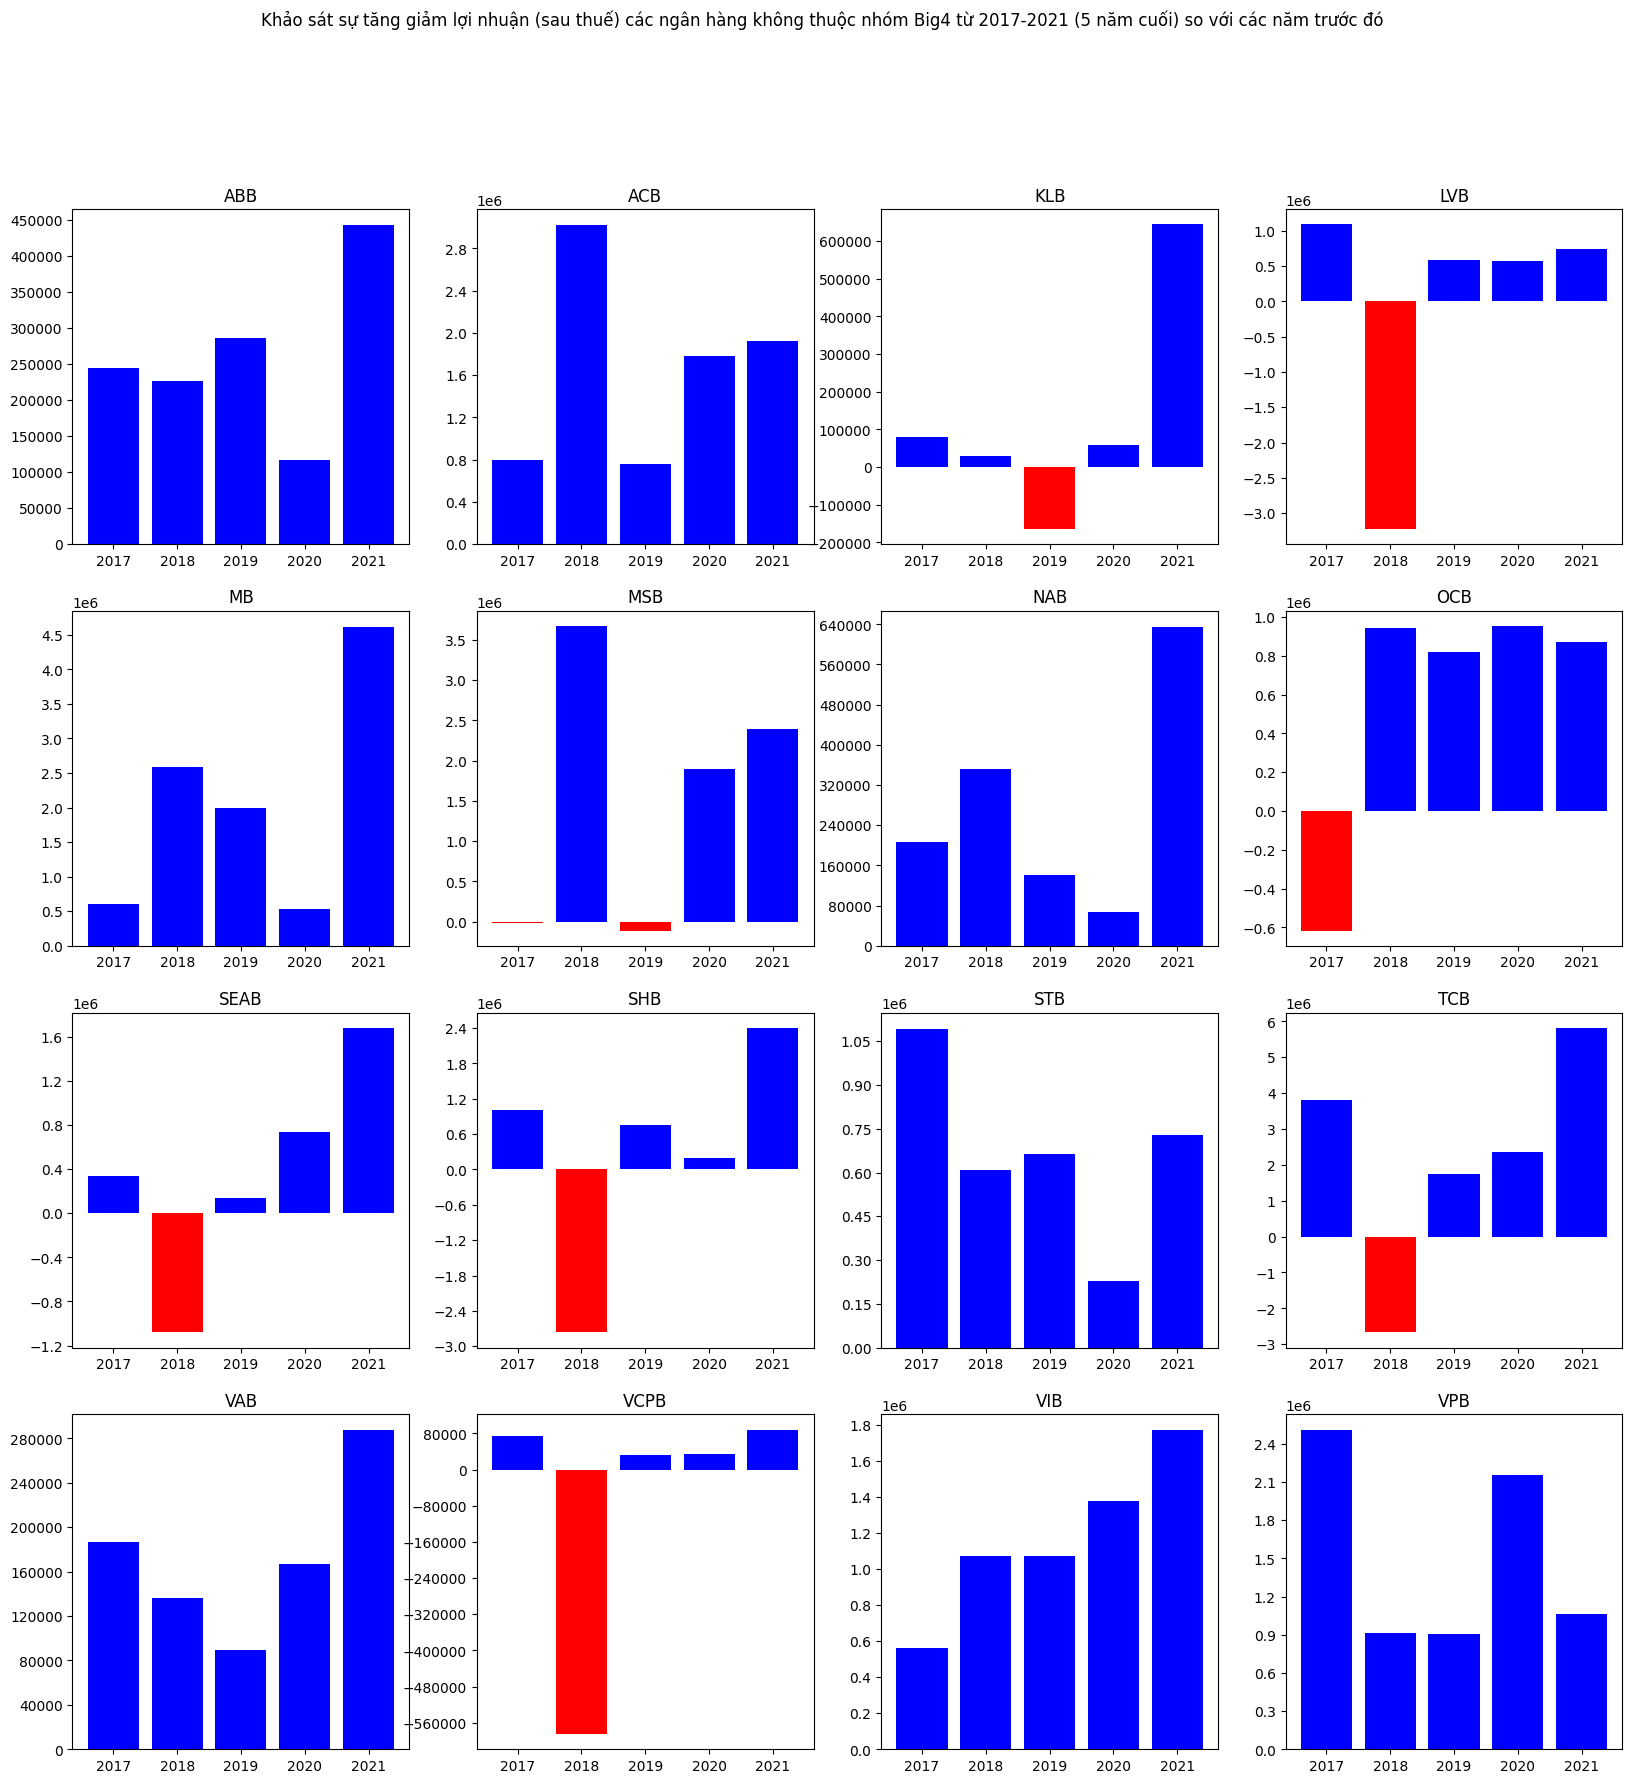

In [ ]:
cols = 4
fig, ax = plt.subplots(len(not_big4_labels) // cols,cols,figsize=(20,20))
plt.setp(ax, xticks=[i for i in range(2016, 2022)])

cnt=0
for a in range(len(not_big4_labels) // cols):
    for b in range(0, cols):
        ax[a, b].bar(df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['Year'][-5:].tolist(),
                    df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['delta_profit_after_tax'][-5:].tolist(),
                    color=['r' if x < 0 else 'b' for x in df_cau5_rest_observe[df_cau5_rest_observe['Bank Code'] == not_big4_labels[cnt]]['delta_profit_after_tax'][-5:].tolist()])
        ax[a, b].set_title(not_big4_labels[cnt])

        ya = ax[a, b].get_yaxis()
        ya.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
        cnt+=1

plt.suptitle("Khảo sát sự tăng giảm lợi nhuận (sau thuế) các ngân hàng không thuộc nhóm Big4 từ 2017-2021 (5 năm cuối) so với các năm trước đó")
plt.show()

Hầu hết các ngân hàng đều có lợi nhuận sau thuế tăng trong dịch COVID, dù một số ngân hàng có mức tăng lợi nhuận khá thấp. Tương tự với AGB của nhóm nhóm Big4, do ít chịu tác động của dịch COVID lên xuất nhập khẩu, nên các ngân hàng ngoài Big4 có thể giữ được mức tăng lợi nhuận, bất kể có yếu tố dịch bệnh hay không.

### Kết luận

Bằng các phương pháp tính toán và trực quan hóa, nhóm đưa ra kết luận rằng dịch COVID có ảnh hưởng chủ yếu đến một số ngân hàng, nhưng không phải là toàn bộ. Vì vậy, ảnh hưởng của COVID là **rất nhỏ** đến doanh thu, cũng như lợi nhuận sau thuế của các ngân hàng.

## C6. Có thể dự đoán lợi nhuận của ngân hàng bằng các số liệu hay không?

Ta cần bổ sung một số yếu tố, bao gồm GDP và lạm phát. Các yếu tố này ảnh hưởng trực tiếp đến doanh thu và lợi nhuận của các ngân hàng theo từng năm.

In [ ]:
GDP_INFLATION_DATA_PATH = "/content/gdp-inflation.xlsx"

In [ ]:
gdp_inflation_df = pd.read_excel(GDP_INFLATION_DATA_PATH, sheet_name="GDP and Inflation")

In [ ]:
gdp_inflation_df

,Year,GDP,Inflation Rate
0,2002,535762.00,3.830828
1,2003,613443.00,3.234648
2,2004,715307.00,7.754947
3,2005,914001.00,8.284572
4,2006,1061565.00,7.418017
5,2007,1246769.00,8.344449
6,2008,1616047.00,23.115448
7,2009,1809149.00,6.716983
8,2010,2739843.17,9.207466
9,2011,3539881.31,18.677732


Note: đơn vị GDP (tỷ đồng), đơn vị lạm phát (% so với năm trước đó)

In [ ]:
gdp_inflation_df["GDP"].describe()

count    2.000000e+01
mean     3.832057e+06
std      2.728162e+06
min      5.357620e+05
25%      1.200468e+06
50%      3.806822e+06
75%      5.803027e+06
max      8.479666e+06
Name: GDP, dtype: float64

In [ ]:
df_cau6 = df[[
    "Year",
    "Total Deposits",
    "Total Shareholder's Equity",
    "Total Loans",
    "Loan Loss Provisions Ratio",
    "Total Fixed Assets",
    "Liquid Assets Over Total Deposits",
    "Profits After Tax"
]]

In [ ]:
df_cau6

,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions Ratio,Total Fixed Assets,Liquid Assets Over Total Deposits,Profits After Tax
1,2005,209317,188076,406400,0.23622,1828,129.698018,8230
2,2006,1551159,1190274,1130930,1.275941,6664,127.408215,12674
3,2007,6776279,2479200,6858134,0.843509,79873,151.057977,161776
4,2008,6673746,3955514,6538980,1.242227,480524,97.016293,49696
5,2009,15001842,4489436,12882962,1.105802,507124,87.509241,311647
...,...,...,...,...,...,...,...,...
627,2008,859372,1101678,1364529,0.424176,112021,138.580149,99368
628,2009,3309044,1136828,1791248,0.348528,118917,254.159661,119501
629,2010,5593260,1993434,3972547,0.753295,138318,93.935648,51085
630,2011,12629595,3162784,8810998,0.490716,1265746,40.292329,120760


Xóa các dòng mất dữ liệu

In [ ]:
df_cau6 = df_cau6.dropna()

In [ ]:
df_cau6["GDP"] = df_cau6["Year"].map(gdp_inflation_df.set_index("Year")["GDP"])
df_cau6["Inflation Rate"] = df_cau6["Year"].map(gdp_inflation_df.set_index("Year")["Inflation Rate"])

<ipython-input-69-014040b23ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau6["GDP"] = df_cau6["Year"].map(gdp_inflation_df.set_index("Year")["GDP"])
<ipython-input-69-014040b23ec6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cau6["Inflation Rate"] = df_cau6["Year"].map(gdp_inflation_df.set_index("Year")["Inflation Rate"])


In [ ]:
df_cau6

,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions Ratio,Total Fixed Assets,Liquid Assets Over Total Deposits,Profits After Tax,GDP,Inflation Rate
1,2005,209317,188076,406400,0.23622,1828,129.698018,8230,914001.00,8.284572
2,2006,1551159,1190274,1130930,1.275941,6664,127.408215,12674,1061565.00,7.418017
3,2007,6776279,2479200,6858134,0.843509,79873,151.057977,161776,1246769.00,8.344449
4,2008,6673746,3955514,6538980,1.242227,480524,97.016293,49696,1616047.00,23.115448
5,2009,15001842,4489436,12882962,1.105802,507124,87.509241,311647,1809149.00,6.716983
...,...,...,...,...,...,...,...,...,...,...
627,2008,859372,1101678,1364529,0.424176,112021,138.580149,99368,1616047.00,23.115448
628,2009,3309044,1136828,1791248,0.348528,118917,254.159661,119501,1809149.00,6.716983
629,2010,5593260,1993434,3972547,0.753295,138318,93.935648,51085,2739843.17,9.207466
630,2011,12629595,3162784,8810998,0.490716,1265746,40.292329,120760,3539881.31,18.677732


In [ ]:
df_cau6[df_cau6["Year"] == 2021]

,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions Ratio,Total Fixed Assets,Liquid Assets Over Total Deposits,Profits After Tax,GDP,Inflation Rate
17,2021,67839732,11729061,68173079,1.189502,913863,69.693729,1559978,8479666.5,1.834716
37,2021,379920669,44900909,356050950,1.646278,3762548,44.208294,9602747,8479666.5,1.834716
57,2021,1404875777,73084295,1189500756,2.056114,10410433,26.209842,36634012,8479666.5,1.834716
77,2021,1380397799,86329026,1345632643,2.162828,10741232,29.362689,10841271,8479666.5,1.834716
119,2021,1161848113,93649511,1130667767,2.281404,10496152,33.603659,14215342,8479666.5,1.834716
230,2021,51397605,4679417,38020523,0.964784,1403268,86.382813,770273,8479666.5,1.834716
244,2021,180000000,17000000,210000000,1.509858,1584457,43.564191,2856088,8479666.5,1.834716
263,2021,384692155,62486023,363554778,2.408904,4678447,64.380018,13219131,8479666.5,1.834716
280,2021,94616419,22037785,99875801,1.688906,311581,109.36584,7966638,8479666.5,1.834716
319,2021,115319388,8024842,102653266,1.249607,981992,43.01293,1434363,8479666.5,1.834716


In [ ]:
df_cau6 = df_cau6.drop(["Year"], axis=1)
df_cau6_X = df_cau6.drop(["Profits After Tax"], axis=1)
df_cau6_y = df_cau6["Profits After Tax"]

Chia tập train và test, sau đó lưu thành file csv

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_cau6_train_X, df_cau6_test_X, df_cau6_train_y, df_cau6_test_y = train_test_split(df_cau6_X, df_cau6_y, test_size=.2, random_state=42)

In [ ]:
df_cau6_train_X

,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions Ratio,Total Fixed Assets,Liquid Assets Over Total Deposits,GDP,Inflation Rate
225,22889160,3363886,19766439,0.858981,1315479,40.932433,5639401.00,2.668248
443,14672147,2417045,12828748,0.990619,853627,93.965948,1809149.00,6.716983
540,4617189,27642024,120416528,0.291212,2002142,154.688556,4473655.60,6.592675
147,117539696,14251181,101324328,1.042226,3214194,38.141184,6293904.55,3.520257
630,12629595,3162784,8810998,0.490716,1265746,40.292329,3539881.31,18.677732
...,...,...,...,...,...,...,...,...
80,42407603,3311896,29513081,0.909319,259695,48.422824,4473655.60,6.592675
115,752935338,63765283,790688059,1.050076,11436527,38.905898,6293904.55,3.520257
285,1297603,577616,1339146,0.739128,27904,52.006507,1616047.00,23.115448
452,225224141,16332532,216988881,1.383587,4792434,45.063861,7009042.13,3.539628


Ta tiến hành norm dữ liệu:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
scaler.fit(df_cau6_train_X)

StandardScaler()

In [ ]:
df_cau6_train_X_scaled = scaler.transform(df_cau6_train_X)
df_cau6_test_X_scaled = scaler.transform(df_cau6_test_X)

In [ ]:
df_cau6_train_X_scaled

array([[-0.41359845, -0.48319397, -0.41177512, ..., -0.73559617,
         0.69969852, -0.83745957],
       [-0.45084242, -0.53900015, -0.44589295, ...,  0.22826342,
        -0.8816305 , -0.14667247],
       [-0.49641696,  0.94774315,  0.08319687, ...,  1.33186872,
         0.21841765, -0.16788165],
       ...,
       [-0.51146313, -0.64741485, -0.50239594, ..., -0.53432999,
        -0.96135314,  2.65120139],
       [ 0.50349377,  0.2811693 ,  0.55811557, ..., -0.66050938,
         1.26515825, -0.68878645],
       [ 1.13475414,  2.5056653 ,  1.3415136 , ..., -0.51719293,
         0.21841765, -0.16788165]])

In [ ]:
df_cau6_train_X_scaled.min(), df_cau6_train_X_scaled.max()

(-2.240326118284503, 8.52747662080173)

Ta cũng cần phải norm label vì giá trị sau norm của data và label chênh lệch nhau một khoảng khá lớn. Ở đây ta chỉ cần chia giá trị label (profit) cho 1e7.

In [ ]:
df_cau6_train_y = df_cau6_train_y / 1e7
df_cau6_test_y = df_cau6_test_y / 1e7

In [ ]:
df_cau6_train_y

225    0.012099
443    0.031841
540    0.017587
147     0.30289
630    0.012076
         ...   
80      0.01923
115     0.74589
285    0.006648
452    0.167232
111    0.580798
Name: Profits After Tax, Length: 476, dtype: object

In [ ]:
df_cau6_train_y.min(), df_cau6_train_y.max()

(-0.3398003, 3.6634012)

In [ ]:
df_cau6_test_y.min(), df_cau6_test_y.max()

(0.0002174, 1.6834059)

In [ ]:
# df_cau6_train_X_scaled.to_csv("/content/train_X.csv", index=False)
# df_cau6_train_y.to_csv("/content/train_y.csv", index=False)
# df_cau6_test_X_scaled.to_csv("/content/test_X.csv", index=False)
# df_cau6_test_y.to_csv("/content/test_y.csv", index=False)

### Linear Regression

### Dùng statsmodel

In [ ]:
statmodel_lr_training_df = pd.DataFrame(df_cau6_train_X_scaled, index=df_cau6_train_X.index, columns=df_cau6_train_X.columns)

In [ ]:
statmodel_lr_training_df

,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions Ratio,Total Fixed Assets,Liquid Assets Over Total Deposits,GDP,Inflation Rate
225,-0.413598,-0.483194,-0.411775,-0.395775,-0.093657,-0.735596,0.699699,-0.837460
443,-0.450842,-0.539000,-0.445893,-0.260055,-0.284817,0.228263,-0.881631,-0.146672
540,-0.496417,0.947743,0.083197,-0.981154,0.190552,1.331869,0.218418,-0.167882
147,0.015409,0.158496,-0.010694,-0.206848,0.692219,-0.786326,0.969912,-0.692092
630,-0.460100,-0.495047,-0.465651,-0.775462,-0.114241,-0.747230,-0.167093,1.894047
...,...,...,...,...,...,...,...,...
80,-0.325130,-0.486258,-0.363844,-0.343877,-0.530644,-0.599462,0.218418,-0.167882
115,2.895368,3.076824,3.379425,-0.198754,4.095434,-0.772427,0.969912,-0.692092
285,-0.511463,-0.647415,-0.502396,-0.519346,-0.626583,-0.534330,-0.961353,2.651201
452,0.503494,0.281169,0.558116,0.145101,1.345451,-0.660509,1.265158,-0.688786


In [ ]:
statmodel_lr_training_df_labels = pd.DataFrame(df_cau6_train_y)

In [ ]:
statmodel_lr_training_df_labels

,Profits After Tax
225,0.012099
443,0.031841
540,0.017587
147,0.30289
630,0.012076
...,...
80,0.01923
115,0.74589
285,0.006648
452,0.167232


In [ ]:
statmodel_lr = sm.OLS(statmodel_lr_training_df_labels.astype(float), statmodel_lr_training_df.astype(float)).fit()

In [ ]:
print(statmodel_lr.summary())

                                 OLS Regression Results                                
Dep. Variable:      Profits After Tax   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.598
Method:                 Least Squares   F-statistic:                              89.44
Date:                Fri, 28 Jul 2023   Prob (F-statistic):                    2.55e-89
Time:                        02:52:35   Log-Likelihood:                         -1.6025
No. Observations:                 476   AIC:                                      19.20
Df Residuals:                     468   BIC:                                      52.53
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

#### Dùng module LinearRegression của sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(df_cau6_train_X_scaled, df_cau6_train_y)

LinearRegression()

In [ ]:
#Truy cập hệ số và hệ số chặn
coefficients = regr.coef_
intercept = regr.intercept_

# Tạo chuỗi công thức hồi quy dễ đọc
formula = "y = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients):
    formula += " + {:.2f} * x{}".format(coef, i+1)

print(formula)

 #Total Deposits	+ Total Shareholder's Equity +	Total Loans	 + Loan Loss Provisions Ratio	+ Total Fixed Assets	+ Liquid Assets Over Total Deposits +	GDP	+ Inflation Rate

y = 0.17 + 0.40 * x1 + 0.36 * x2 + -0.37 * x3 + -0.01 * x4 + -0.11 * x5 + -0.01 * x6 + 0.00 * x7 + 0.01 * x8


Đánh giá kết quả của mô hình trên tập train bằng các độ đo MAE, MSE và RMSE

In [ ]:
def rmse(actual, predict):
    mse = metrics.mean_squared_error(actual, predict)
    return np.sqrt(mse)

In [ ]:
y_train_pred = regr.predict(df_cau6_train_X_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_pred, df_cau6_train_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_train_pred, df_cau6_train_y))
print('Root Mean Squared Error:', rmse(y_train_pred, df_cau6_train_y))

Mean Absolute Error: 0.08085410338801395
Mean Squared Error: 0.029466716469278086
Root Mean Squared Error: 0.17165872092404186


Đánh giá kết quả của mô hình trên tập test bằng các độ đo MAE, MSE và RMSE

In [ ]:
y_test_pred_lr = regr.predict(df_cau6_test_X_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pred_lr, df_cau6_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pred_lr, df_cau6_test_y))
print('Root Mean Squared Error:', rmse(y_test_pred_lr, df_cau6_test_y))

Mean Absolute Error: 0.07580676588779972
Mean Squared Error: 0.017513455971131235
Root Mean Squared Error: 0.13233841457086917


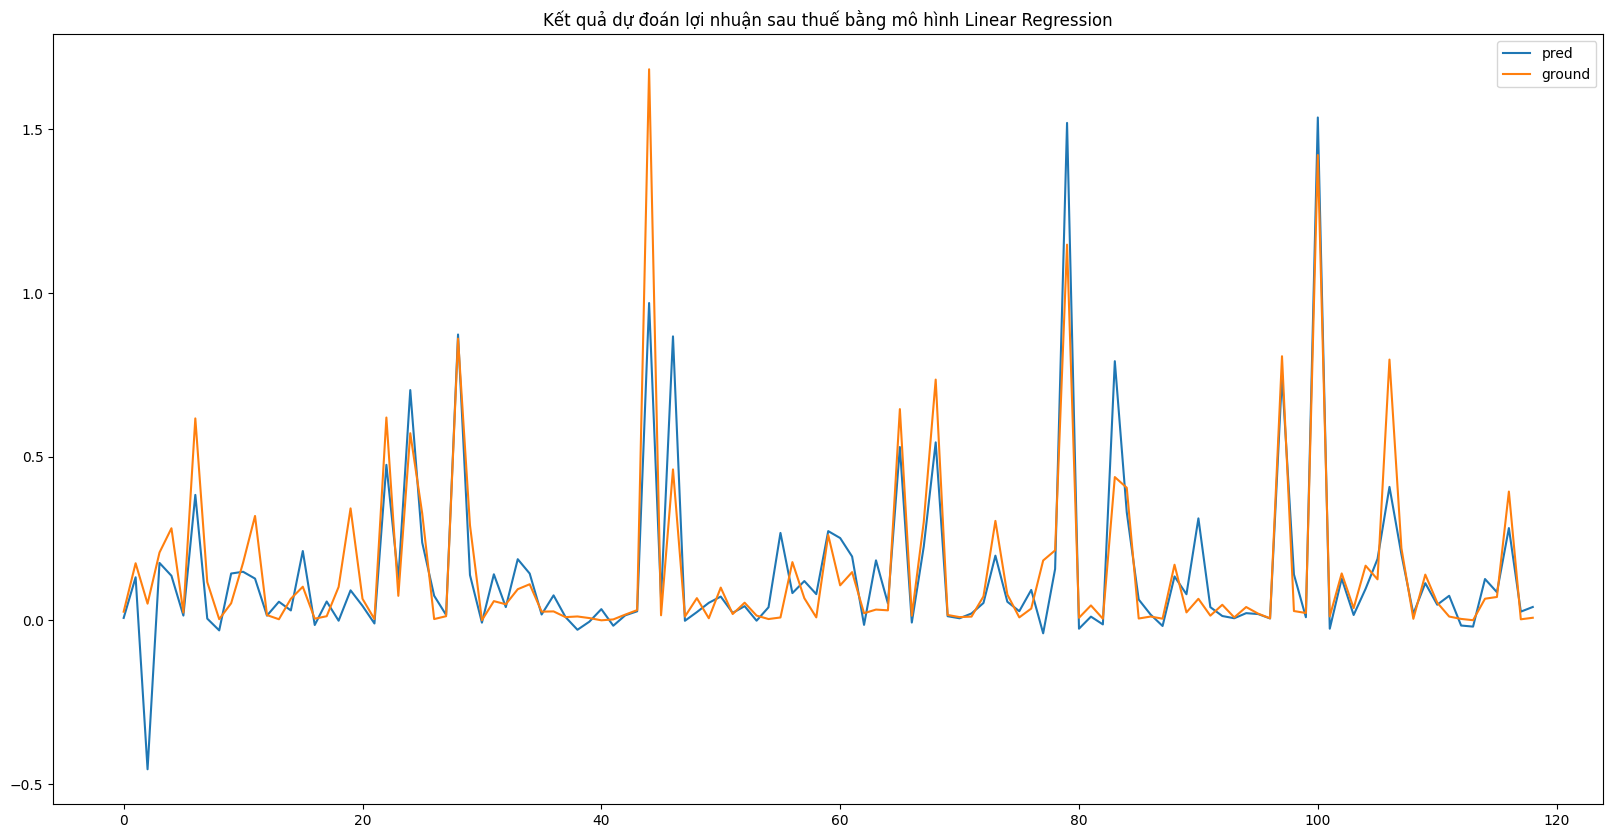

In [ ]:
linear_test_df = pd.DataFrame({"pred": y_test_pred_lr, "ground": df_cau6_test_y}).reset_index().drop(["index"], axis=1)
linear_test_df.plot(figsize=(20, 10))
plt.title("Kết quả dự đoán lợi nhuận sau thuế bằng mô hình Linear Regression")
plt.show()

In [ ]:
linear_test_df

,pred,ground
0,0.007503,0.026515
1,0.131691,0.174517
2,-0.454831,0.051038
3,0.175523,0.207276
4,0.136245,0.28137
...,...,...
114,0.126314,0.066189
115,0.085984,0.071499
116,0.281918,0.393504
117,0.026691,0.003286


### Sử dụng mạng Neural

#### Dùng Module MLPRegressor của sklearn

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
neural_model = MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    activation="relu",
    solver="lbfgs",
    alpha=0.01,
    max_iter=300,
    random_state=42,
    verbose=True
)

In [ ]:
neural_model.fit(df_cau6_train_X_scaled, df_cau6_train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=0.01, hidden_layer_sizes=(150, 100, 50), max_iter=300,
             random_state=42, solver='lbfgs', verbose=True)

Tính toán MAE, MSE, RMSE và RMSLE trên tập huấn luyện:

In [ ]:
y_train_pred = neural_model.predict(df_cau6_train_X_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train_pred, df_cau6_train_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_train_pred, df_cau6_train_y))
print('Root Mean Squared Error:', rmse(y_train_pred, df_cau6_train_y))

Mean Absolute Error: 0.020929398472355656
Mean Squared Error: 0.001996175962825561
Root Mean Squared Error: 0.04467858505845458


Tính toán MAE, MSE và RMSE trên tập kiểm thử:

In [ ]:
y_test_pred_mlp = neural_model.predict(df_cau6_test_X_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pred_mlp, df_cau6_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pred_mlp, df_cau6_test_y))
print('Root Mean Squared Error:', rmse(y_test_pred_mlp, df_cau6_test_y))

Mean Absolute Error: 0.17365264737537425
Mean Squared Error: 1.22036146576368
Root Mean Squared Error: 1.104699717463384


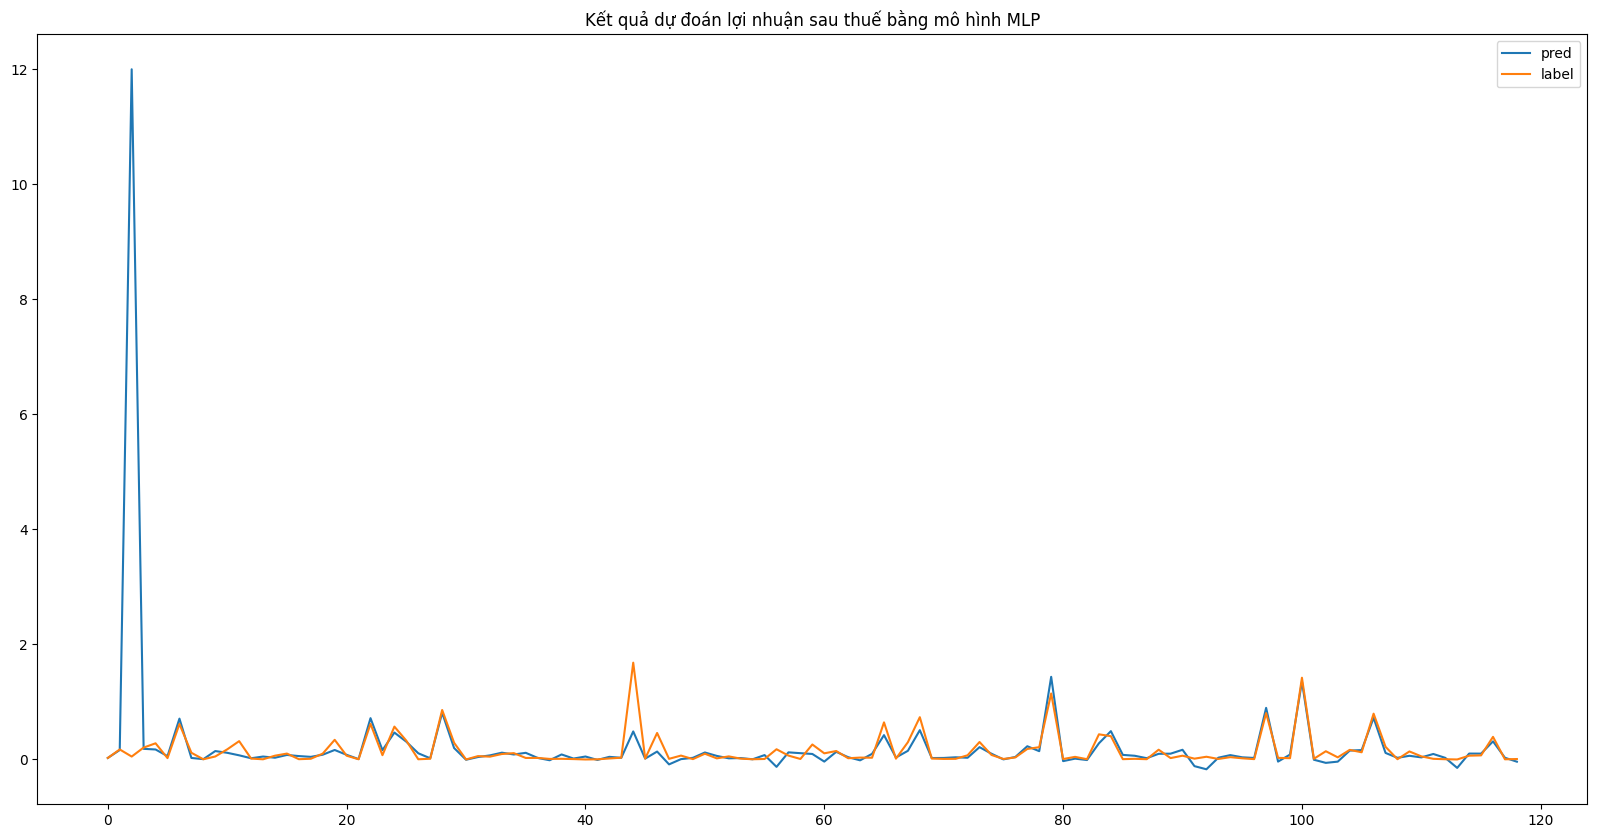

In [ ]:
test_df_mlp = pd.DataFrame({"pred": y_test_pred_mlp, "label": df_cau6_test_y}).reset_index().drop(["index"], axis=1)
test_df_mlp.plot(figsize=(20, 10))
plt.title("Kết quả dự đoán lợi nhuận sau thuế bằng mô hình MLP")
plt.show()

In [ ]:
test_df_mlp

,pred,label
0,0.026438,0.026515
1,0.164556,0.174517
2,12.001050,0.051038
3,0.185279,0.207276
4,0.173978,0.28137
...,...,...
114,0.102776,0.066189
115,0.101977,0.071499
116,0.315268,0.393504
117,0.030179,0.003286


#### Dùng GridSearch để tìm hyperparameters tốt nhất

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
param_grid = {
    "hidden_layer_sizes" : [(150, 100, 50), (100, 50), (150, 50), (150, 100)],
    "activation" : ["relu", "tanh", "logistic", "identity"],
    "solver": ["adam", "sgd", "lbfgs"],
    "alpha": [0.1, 0.01, 0.001]
}

In [ ]:
MLP_GridSearch = GridSearchCV(
    estimator=MLPRegressor(
        max_iter=1000,
        n_iter_no_change=30,
        early_stopping=True,
        random_state=42),
    param_grid=param_grid,
    scoring=make_scorer(rmse, greater_is_better = False),
    n_jobs=-1,
    cv=5,
    verbose=5
)

In [ ]:
MLP_GridSearch.fit(df_cau6_train_X_scaled, df_cau6_train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    n_iter_no_change=30, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic', 'identity'],
                         'alpha': [0.1, 0.01, 0.001],
                         'hidden_layer_sizes': [(150, 100, 50), (100, 50),
                                                (150, 50), (150, 100)],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=5)

In [ ]:
MLP_GridSearch.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (150, 100),
 'solver': 'adam'}

In [ ]:
pred = MLP_GridSearch.predict(df_cau6_test_X_scaled)

Đánh giá kết quả của mô hình trên tập test bằng các độ đo MAE, MSE và RMSE

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(pred, df_cau6_test_y))
print('Mean Squared Error:', metrics.mean_squared_error(pred, df_cau6_test_y))
print('Root Mean Squared Error:', rmse(pred, df_cau6_test_y))

Mean Absolute Error: 0.08121925195187416
Mean Squared Error: 0.017937287677040767
Root Mean Squared Error: 0.13393015969915353


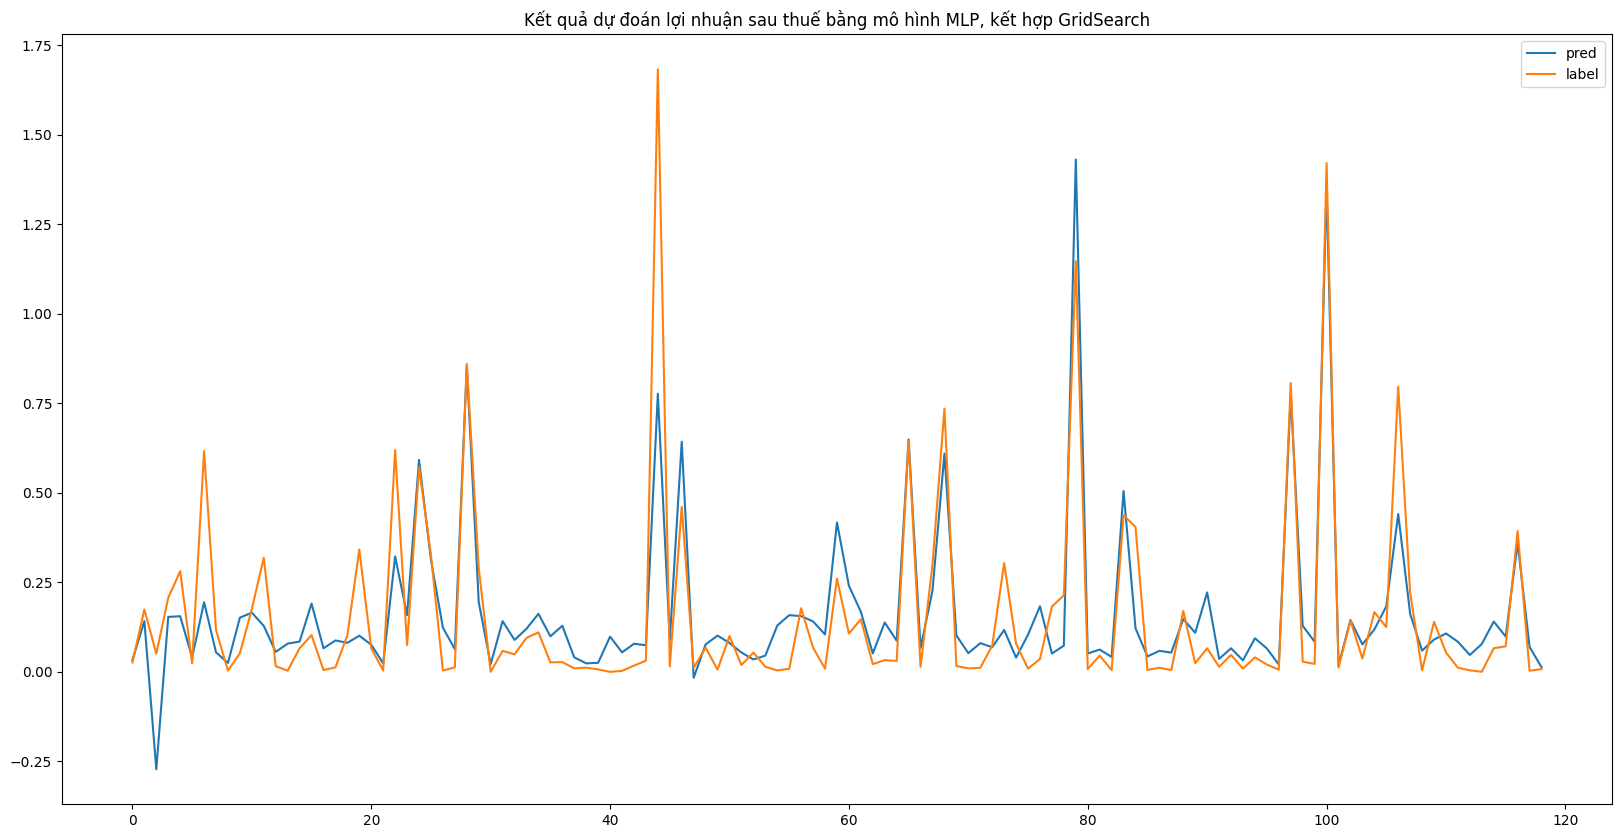

In [ ]:
grid_df = pd.DataFrame({"pred": pred, "label": df_cau6_test_y}).reset_index().drop(["index"], axis=1)
grid_df.plot(figsize=(20,10))
plt.title("Kết quả dự đoán lợi nhuận sau thuế bằng mô hình MLP, kết hợp GridSearch")
plt.show()

In [ ]:
grid_df

,pred,label
0,0.033043,0.026515
1,0.142006,0.174517
2,-0.271900,0.051038
3,0.153675,0.207276
4,0.155635,0.28137
...,...,...
114,0.140800,0.066189
115,0.098881,0.071499
116,0.360034,0.393504
117,0.069802,0.003286
